# Event Detection Via Social Media Data
----
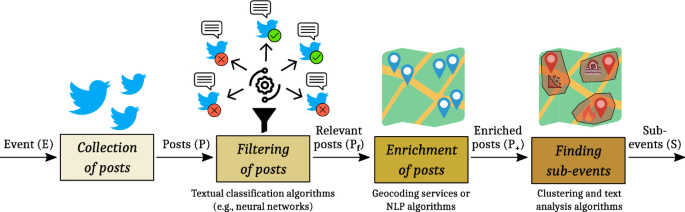

```
[Belcastro, L., Marozzo, F., Talia, D. et al. Using social media for sub-event detection during disasters. J Big Data 8, 79 (2021). https://doi.org/10.1186/s40537-021-00467-1]

```




## Table of Content

## Introduction

##Data Loading

In [1]:
#@title Install Fast Text Model
# !pip install fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
!gunzip cc.ar.300.vec.gz


--2025-06-14 08:35:20--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.74, 18.173.166.51, 18.173.166.31, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1272365870 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ar.300.vec.gz’

cc.ar.300.vec.gz    100%[===================>]   1.18G   139MB/s    in 14s     

2025-06-14 08:35:35 (84.4 MB/s) - ‘cc.ar.300.vec.gz’ saved [1272365870/1272365870]



In [2]:
#@title Install Packages
# Install NLTK
!pip install nltk stanza

# Import and download stopwords
import nltk
nltk.download('stopwords')

# Load Arabic stopwords
from nltk.corpus import stopwords
arabic_stopwords = stopwords.words('arabic')

# !pip install transformers
# !pip install stanza --quiet
# # !pip install --upgrade scipy

# !pip install gensim
import stanza

# Download Arabic model once
stanza.download('ar', verbose=False)

# Initialize pipeline for Arabic with NER
nlp = stanza.Pipeline('ar', processors='tokenize,ner', use_gpu=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#@title Install Packages
!pip install transformers
# !pip install arabic-reshaper
# !pip install python-bidi
# !pip install ar_wordcloud
#@title Fix Dependency Issue
# !pip install scipy==1.10.1
# !pip uninstall -y numpy gensim
# !pip install numpy==1.24.3 gensim==4.3.1
# Fix versions to ensure compatibility
# !pip install --upgrade pip
# !pip install scipy==1.10.1
# !pip uninstall -y numpy gensim
# !pip install numpy==1.24.3 gensim==4.3.1
# !pip install tensorflow==2.13.0  # Stable with numpy 1.24

!pip install tensorflow gensim numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [23]:
#@title import packages
import numpy as np
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
from gensim.models import KeyedVectors

# from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


import matplotlib.pyplot as plt
# import arabic_reshaper
# from bidi.algorithm import get_display
from collections import Counter
import ast
# import arabic_reshaper
# from bidi.algorithm import get_display
# from ar_wordcloud import ArabicWordCloud
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import networkx as nx
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [2]:
#@title uitlities
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)            # remove URLs
    text = re.sub(r'@\w+', '', text)                # remove mentions
    text = re.sub(r'#\w+', '', text)                # remove hashtags
    text = re.sub(r'[^ء-يa-zA-Z0-9\s]', ' ', text) # keep Arabic letters, Latin letters, numbers, and spaces only
    text = re.sub(r'\s+', ' ', text)                 # remove extra whitespace
    return text.strip()

def extract_entities_stanza(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Function to count hashtags in a tweet
def count_hashtags(text):
    return text.count('#')


def embed_tweet(text, model):
    words = text.split()  # simple tokenization; you can replace with better Arabic tokenizer
    word_vectors = []

    for word in words:
        if word in model.key_to_index:
            word_vectors.append(model[word])
        else:
            # A zero vector if the word is OOV (out of vocab)
            word_vectors.append(np.zeros(model.vector_size))

    if word_vectors:
        # Aggregate word vectors by averaging
        tweet_vector = np.mean(word_vectors, axis=0)
    else:
        # Empty or no known words → zero vector
        tweet_vector = np.zeros(model.vector_size)

    return tweet_vector


In [3]:
# @title Utilities

# # Download the Arabic model (only once)
# stanza.download('ar')  # You can comment this line after the first run

# # Initialize the Arabic NLP pipeline
# nlp = stanza.Pipeline(lang='ar', processors='tokenize,ner', use_gpu=False)

# Function to clean a tweet
def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)            # remove URLs
    text = re.sub(r'@\w+', '', text)               # remove mentions
    text = re.sub(r'#\w+', '', text)               # remove hashtags
    text = re.sub(r'[^ء-يa-zA-Z0-9\s]', ' ', text) # keep Arabic letters, Latin letters, numbers, and spaces only
    text = re.sub(r'\s+', ' ', text)               # remove extra whitespace
    return text.strip()

# Function to extract named entities using Stanza
def extract_entities_stanza(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Function to count hashtags in a tweet
def count_hashtags(text):
    if not isinstance(text, str):
        return 0
    return text.count('#')

# Function to embed tweet using word embeddings model
def embed_tweet(text, model):
    words = text.split()  # simple tokenization; consider replacing with a proper Arabic tokenizer
    word_vectors = []

    for word in words:
        if word in model.key_to_index:
            word_vectors.append(model[word])
        else:
            word_vectors.append(np.zeros(model.vector_size))  # out-of-vocab word

    if word_vectors:
        tweet_vector = np.mean(word_vectors, axis=0)
    else:
        tweet_vector = np.zeros(model.vector_size)

    return tweet_vector


In [4]:
# @title Define Constants
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#@title read the data set
df = pd.read_csv("drive/MyDrive/labeled.csv", encoding="utf-8")

In [6]:
#@title Data

df.columns

Index(['Unnamed: 0', 'Label', 'Tweet ID', 'Tweet Text', 'Type', 'Author Name',
       'Author Username', 'Creation Time', 'Reply Count', 'Retweet Count',
       'Quote Count', 'Like Count', 'View Count', 'Bookmark Count', 'Language',
       'Possibly Sensitive', 'Source', 'Hashtags', 'Tweet URL', 'Media Type',
       'Media URLs', 'External URLs', 'Old Tweet Text', 'Named Entities',
       'Persons', 'Organizations', 'Locations', 'tweet_text_replaced',
       'tweet_embedding'],
      dtype='object')

In [7]:
# @title Ensure Type
# Ensure datetime format
df['Creation Time'] = pd.to_datetime(df['Creation Time'])
# Convert Tweet Text to string
df["Tweet Text"] = df["Tweet Text"].astype(str)

# df.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
# Convert stringified entity lists to actual Python lists
# entity_columns = ["Named Entities", "Person Entities", "Organization Entities", "Location Entities"]
entity_columns = ["Named Entities", "Persons", "Organizations", "Locations"]

for col in entity_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

df['tweet_embedding']=df['tweet_embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

In [8]:
# @title Data shape
print(df.shape)


(4565, 29)


In [9]:
#@title Clean the tweet texts
df['Old Tweet Text'] = df['Tweet Text']
df['Tweet Text'] = df['Tweet Text'].apply(clean_tweet)


In [10]:
#@title Remove Duplicates and Non-Arabic Tweets
# Remove duplicate tweets based on 'Tweet Text'
initial_count = len(df)
df = df.drop_duplicates(subset="Tweet Text", keep="first")
removed_duplicates = initial_count - len(df)
print(f"Removed {removed_duplicates} duplicate tweets. Remaining tweets: {len(df)}")

# Remove non-Arabic tweets based on 'Language' column
before_lang_filter = len(df)
df = df[df["Language"] == "ar"]
removed_non_arabic = before_lang_filter - len(df)
print(f"Removed {removed_non_arabic} non-Arabic tweets. Remaining tweets: {len(df)}")

# Drop rows with null values in 'Tweet Text' column
before_drop_na = len(df)
df = df[df["Label"].notna()]
dropped_na = before_drop_na - len(df)
print(f"Dropped {dropped_na} rows with null 'Tweet Text'. Remaining tweets: {len(df)}")


Removed 0 duplicate tweets. Remaining tweets: 4565
Removed 0 non-Arabic tweets. Remaining tweets: 4565
Dropped 0 rows with null 'Tweet Text'. Remaining tweets: 4565


## Explore Dataset

In [ ]:
#@title Some Sampels From the Dataset
df.sample(2)

Label      Tweet ID                                         Tweet Text  \
4986     0  1.921580e+18                    ماشاء الله الله أكبر ولله الحمد   
3018     1  1.925250e+18  مجموعة من الطائفة الدرزية تطرد محافظ السويداء ...   

       Type  Author Name Author Username       Creation Time  Reply Count  \
4986  Tweet         محمد      LornL89403 2025-05-11 18:14:38          0.0   
3018  Tweet  AHMAD SLMAN     ahmadslmanx 2025-05-21 20:57:39          0.0   

      Retweet Count  Quote Count  ...  Bookmark Count  Language  \
4986            0.0          0.0  ...             0.0        ar   
3018            3.0          0.0  ...             0.0        ar   

      Possibly Sensitive               Source      Hashtags  \
4986                  No  Twitter for Android  #سوريا, #حلب   
3018                  No  Twitter for Android           NaN   

                                              Tweet URL Media Type Media URLs  \
4986  https://x.com/LornL89403/status/19215847417965...        NaN        NaN   
3018  https://x.com/ahmadslmanx/status/1925249644251...        NaN        NaN   

     External URLs                                     Old Tweet Text  
4986           NaN   ماشاء الله ، الله أكبر ولله الحمد\n#سوريا \n#حلب  
3018           NaN  مجموعة من الطائفة الدرزية تطرد محافظ السويداء ...  

[2 rows x 22 columns]

In [11]:
# @title Check for missing values
# Basic DataFrame info
df.info()

# # Check for missing values
# print("\nMissing values per column:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0.1        4565 non-null   int64         
 1   Unnamed: 0          4565 non-null   int64         
 2   Label               4565 non-null   float64       
 3   Tweet ID            4565 non-null   float64       
 4   Tweet Text          4565 non-null   object        
 5   Type                4565 non-null   object        
 6   Author Name         2221 non-null   object        
 7   Author Username     2221 non-null   object        
 8   Creation Time       4565 non-null   datetime64[ns]
 9   Reply Count         4565 non-null   float64       
 10  Retweet Count       4565 non-null   float64       
 11  Quote Count         4565 non-null   float64       
 12  Like Count          4565 non-null   float64       
 13  View Count          4510 non-null   float64     

In [ ]:
# @title Drop rows with missing Label values
df = df.dropna(subset=["Label"])
df = df[df['Label'].isin(['0', '1'])]


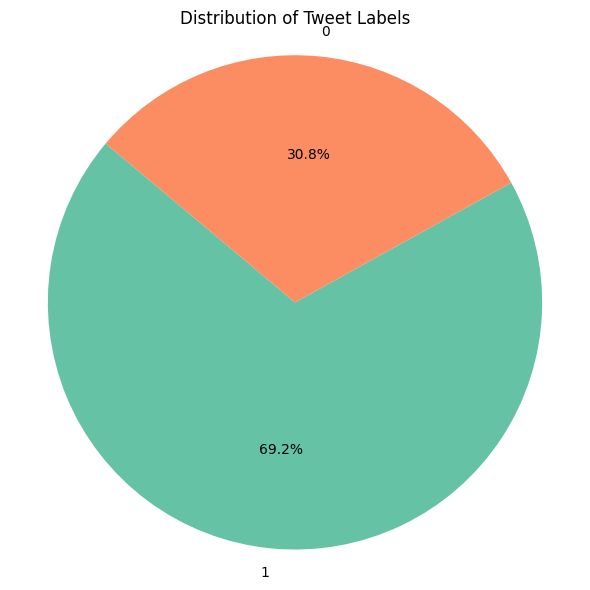

In [ ]:

# @title Plot the distribution of the label values
# Plot the distribution of the label values as a pie chart
plt.figure(figsize=(6, 6))
label_counts = df['Label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Tweet Labels')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()


In [ ]:
# @title The Range of the data
print(df["Creation Time"].min(), df["Creation Time"].max())

2014-06-07 10:35:22 2025-05-27 12:17:25


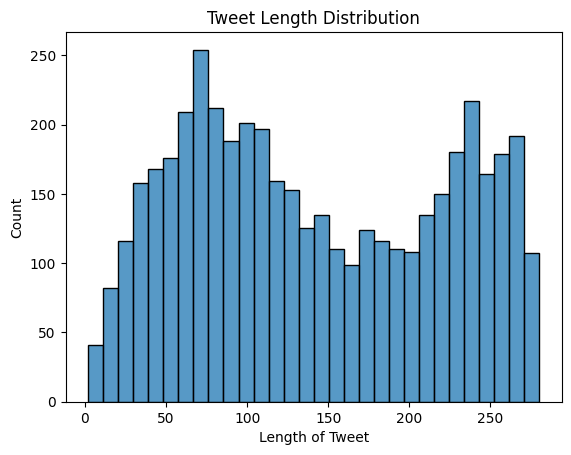

In [ ]:
#@title Tweet length distribution
df['text_length'] = df['Tweet Text'].apply(len)
# df['text_length'].describe()

# Plot distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
# plt.title('Distribution of Tweet Lengths')
# plt.xlabel('Tweet Length')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()
sns.histplot(df['text_length'], bins=30)
plt.title('Tweet Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Count')
plt.show()

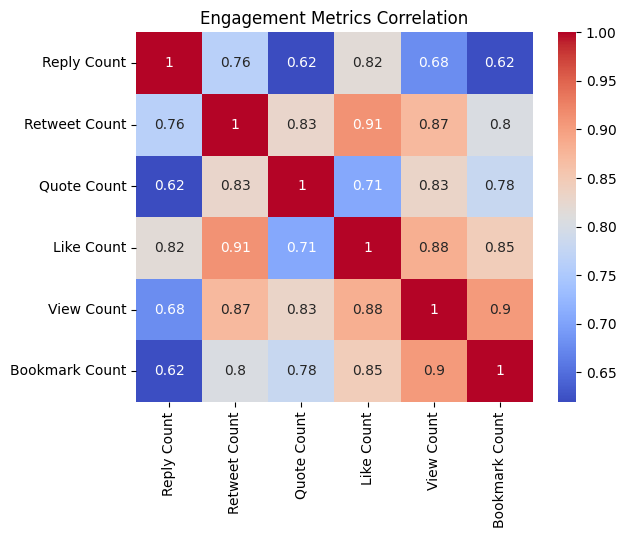

In [ ]:
#@title Correlation Heat Map
engagement_cols = ['Reply Count', 'Retweet Count', 'Quote Count', 'Like Count', 'View Count', 'Bookmark Count']
df[engagement_cols].describe()

# Correlation heatmap
sns.heatmap(df[engagement_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Engagement Metrics Correlation')
plt.show()


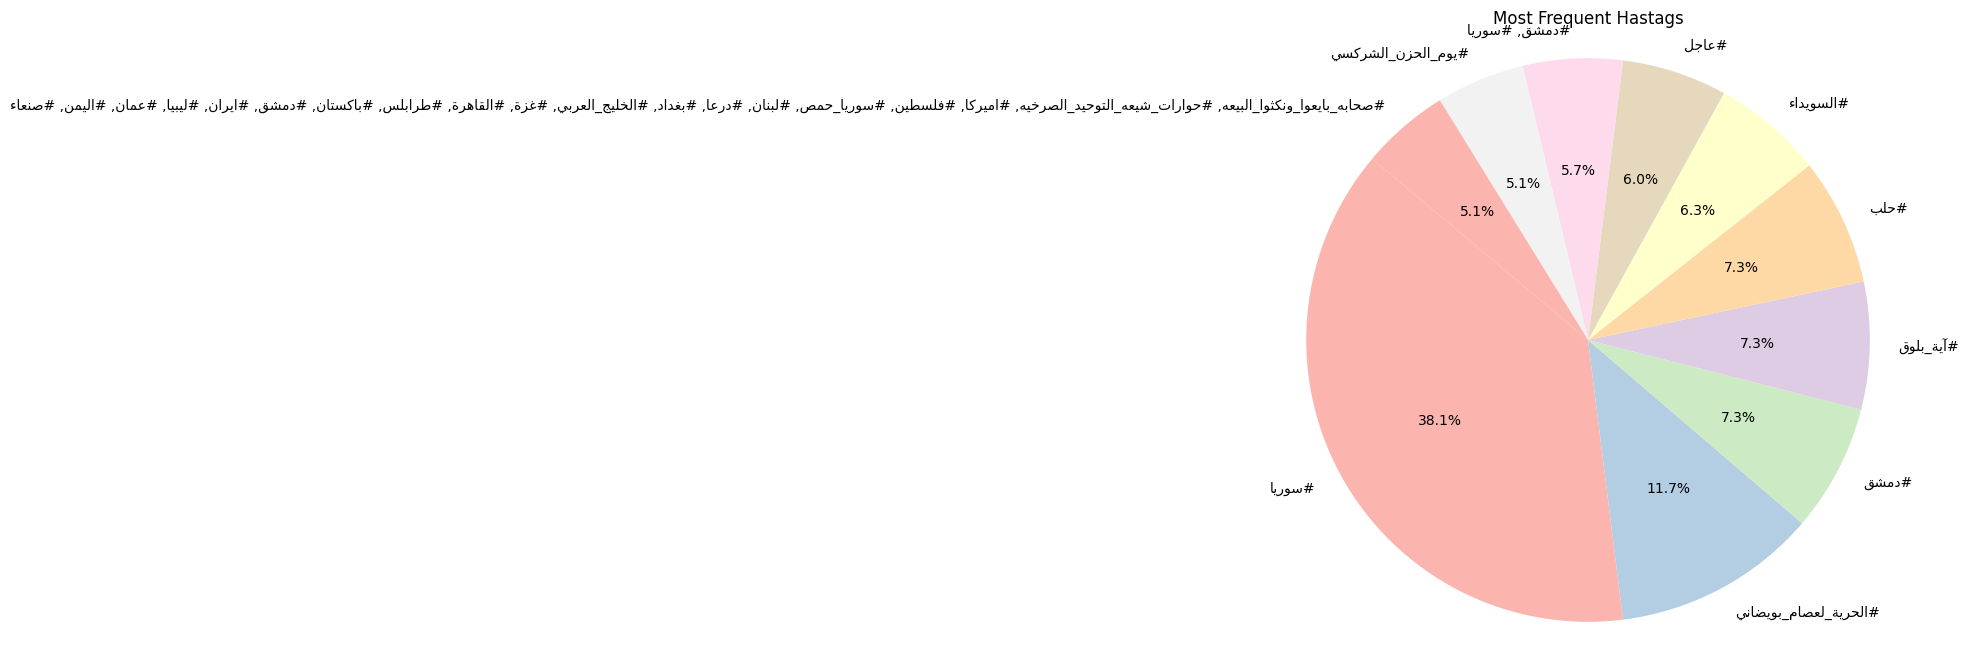

In [ ]:
#@title Frequent Hashtags
# Prepare hashtag counts
all_hashtags = df['Hashtags'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])
flattened = [tag for sublist in all_hashtags for tag in sublist]
hashtag_counts = Counter(flattened)

# Extract top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
labels, counts = zip(*top_hashtags)

# Reshape and reorder Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Most Frequent Hastags")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()


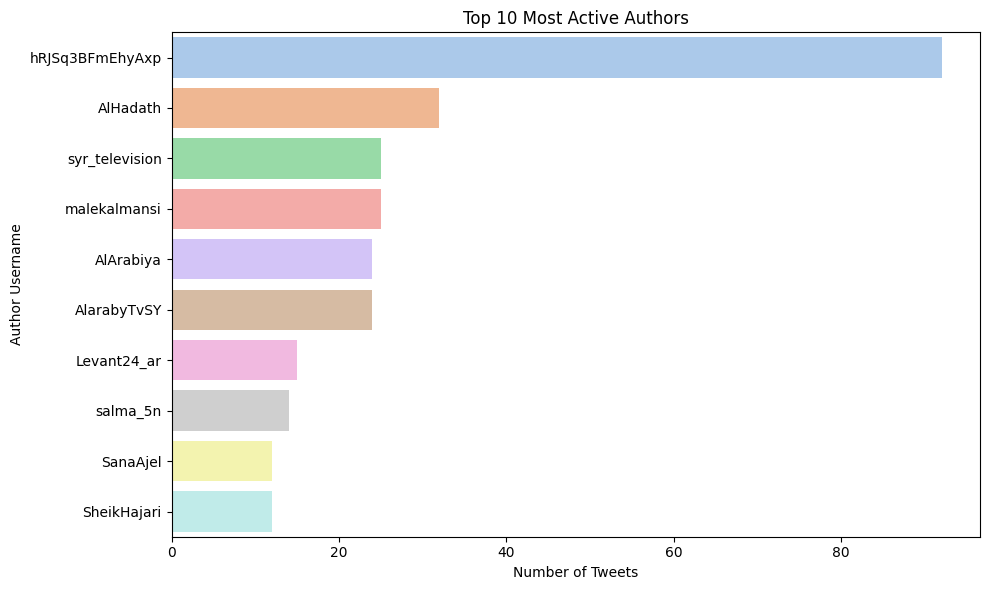

In [ ]:
# @title Most active authors

top_authors = df['Author Username'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='pastel',hue=top_authors.index)
plt.title('Top 10 Most Active Authors')
plt.xlabel('Number of Tweets')
plt.ylabel('Author Username')
plt.tight_layout()
plt.show()

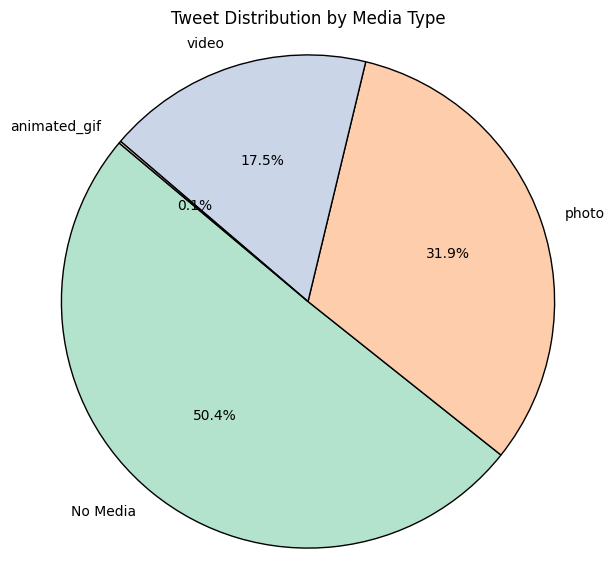

In [ ]:
#@title Media Type
import matplotlib.pyplot as plt

# Get media type counts including NaNs
media_counts = df['Media Type'].value_counts(dropna=False)

# Replace NaN label with 'No Media'
media_counts.index = media_counts.index.fillna('No Media')

plt.figure(figsize=(7,7))
plt.pie(
    media_counts,
    labels=media_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Tweet Distribution by Media Type')
plt.axis('equal')
plt.show()



In [ ]:
#@title External URLs presence
ext_urls=df['External URLs'].notnull().sum()
print(f"Number of tweets with external URLs: {ext_urls}")

Number of tweets with external URLs: 284


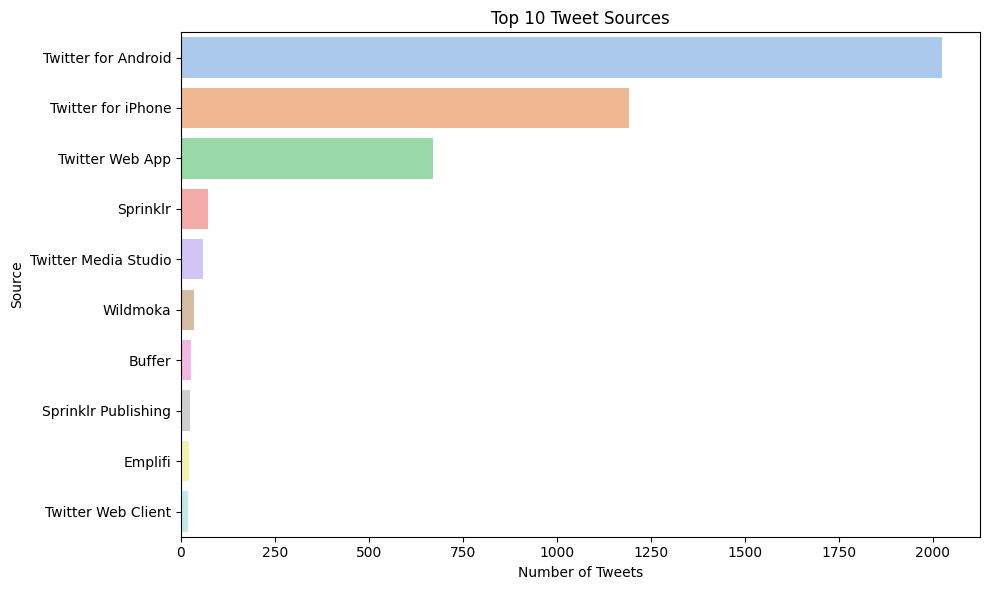

In [ ]:

#@title Most common sources (devices/apps used)

# Get top 10 sources
top_sources = df['Source'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.values, y=top_sources.index, palette='pastel',hue=top_sources.index)
plt.title('Top 10 Tweet Sources')
plt.xlabel('Number of Tweets')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

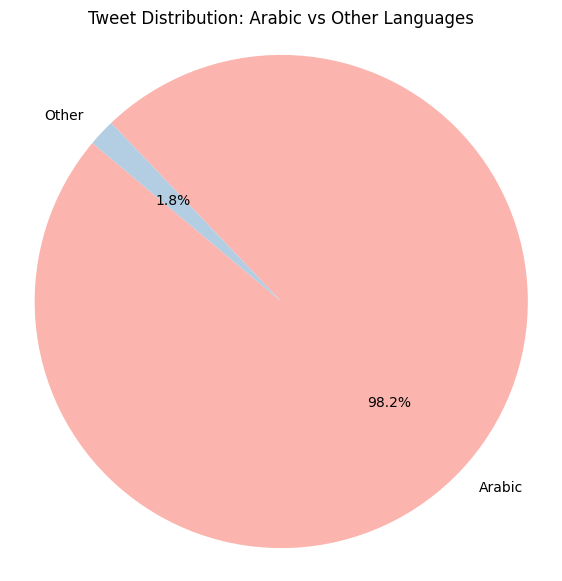

In [ ]:
#@title Languages Distribution
# Count languages
language_counts = df['Language'].value_counts()

arabic_lang = 'ar'  # change if needed
arabic_count = language_counts.get(arabic_lang, 0)

# Sum of all non-Arabic languages
other_count = language_counts.sum() - arabic_count

# Create series for pie chart
pie_counts = [arabic_count, other_count]
labels = ['Arabic', 'Other']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(pie_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Tweet Distribution: Arabic vs Other Languages')
plt.axis('equal')  # Make pie circular
plt.show()


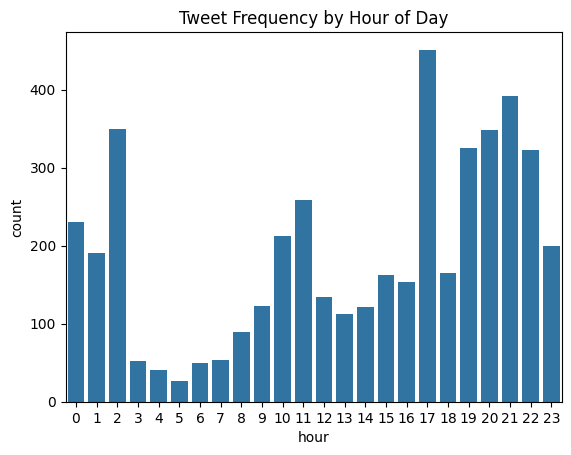

In [ ]:
# @title Tweet Frequency by Hour
# Extract hour and date
df['hour'] = df['Creation Time'].dt.hour
df['date'] = df['Creation Time'].dt.date

# Plot tweet frequency by hour
sns.countplot(x='hour', data=df)
plt.title('Tweet Frequency by Hour of Day')
plt.show()


<ipython-input-100-2e1a0f503a1e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Word Count'] = day_df['Tweet Text'].str.split().apply(len)


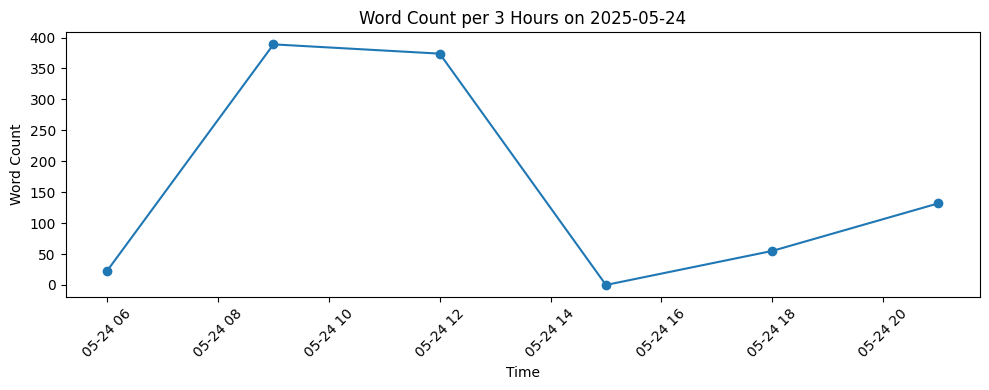

In [ ]:
# @title Word Count per 3 Hours on A Day
# Select a specific date (e.g., May 21, 2025)
selected_day = '2025-05-24'
day_df = df[df['Creation Time'].dt.date == pd.to_datetime(selected_day).date()]

# Create a new column with word count
day_df['Word Count'] = day_df['Tweet Text'].str.split().apply(len)

# Set datetime index to resample
day_df = day_df.set_index('Creation Time')

# Resample every 3 hours and sum word counts
word_counts_3h = day_df['Word Count'].resample('3h').sum()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(word_counts_3h.index, word_counts_3h.values, marker='o')
plt.title(f'Word Count per 3 Hours on {selected_day}')
plt.xlabel('Time')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


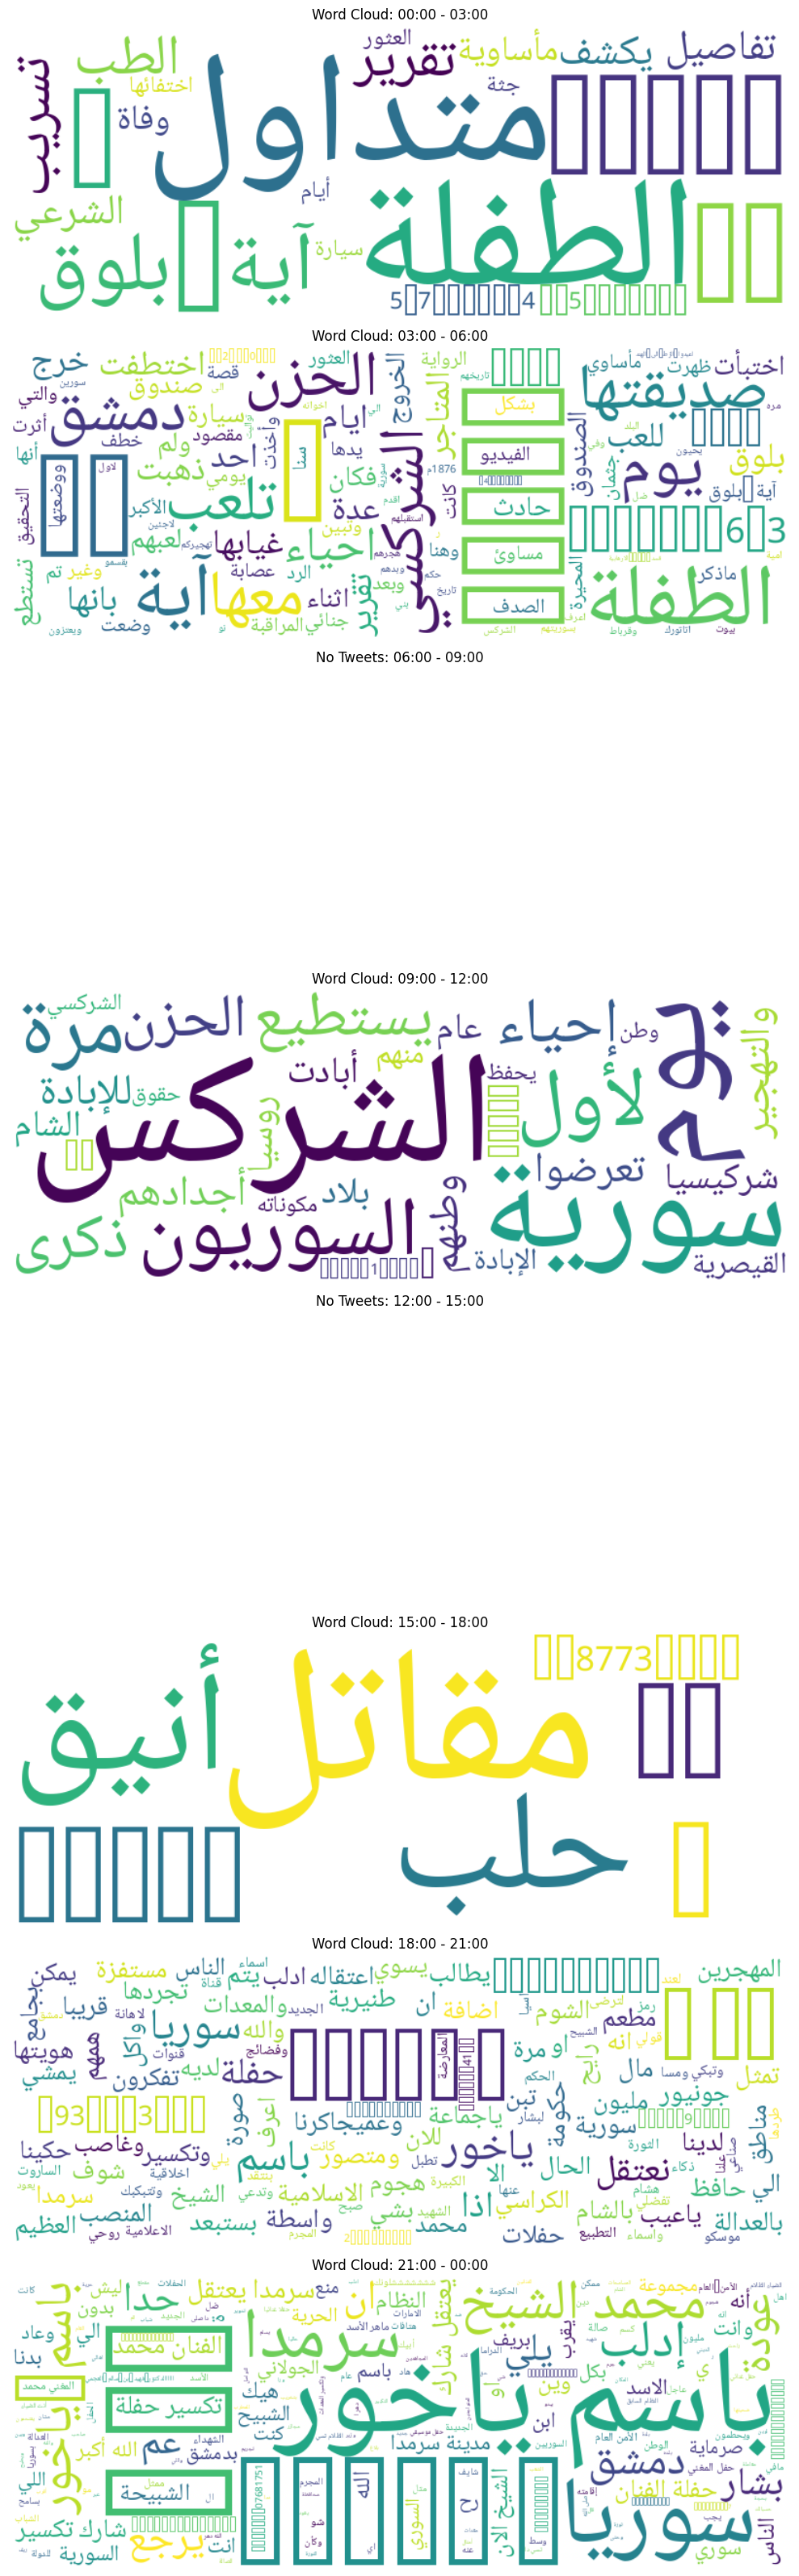

In [ ]:
#@title  word cloud for a day
# Filter tweets for the selected day first
selected_day = '2025-05-23'
day_df = df[df['Creation Time'].dt.date == pd.to_datetime(selected_day).date()].copy()
day_df = day_df.set_index('Creation Time')

# Resample every 3 hours
intervals = list(day_df.resample('3h'))

# Create subplots
fig, axs = plt.subplots(len(intervals), 1, figsize=(10, 4 * len(intervals)))
if len(intervals) == 1:
    axs = [axs]

for i, (time_bin, group) in enumerate(intervals):
    # Join all tweet texts into one string
    all_text = ' '.join(group['Tweet Text'].dropna().astype(str))

    if all_text.strip():
        # Remove stop words
        words = all_text.split()
        filtered_words = [w for w in words if w not in arabic_stopwords]
        filtered_text = ' '.join(filtered_words)

        # Generate Arabic word cloud
        wc = ArabicWordCloud(
            width=800,
            height=300,
            background_color='white'
        ).generate(filtered_text)

        axs[i].imshow(wc, interpolation='bilinear')
        axs[i].axis('off')
        axs[i].set_title(f'Word Cloud: {time_bin.strftime("%H:%M")} - {(time_bin + pd.Timedelta(hours=3)).strftime("%H:%M")}')
    else:
        axs[i].axis('off')
        axs[i].set_title(f'No Tweets: {time_bin.strftime("%H:%M")} - {(time_bin + pd.Timedelta(hours=3)).strftime("%H:%M")}')

plt.tight_layout()
plt.show()


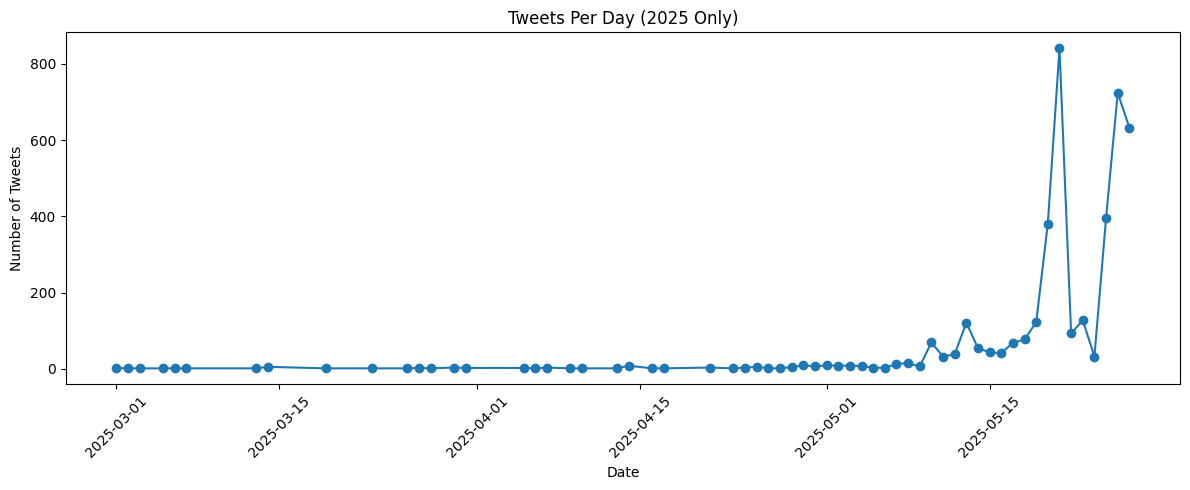

In [ ]:
#@title Tweets Per Day

# Ensure 'date' column is of type Timestamp
df['date'] = pd.to_datetime(df['date'])

# Filter only tweets from 2025 onwards
df_filtered = df[df['date'] >= pd.Timestamp('2025-3-01')]

# Count tweets per day
daily_counts = df_filtered['date'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Tweets Per Day (2025 Only)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


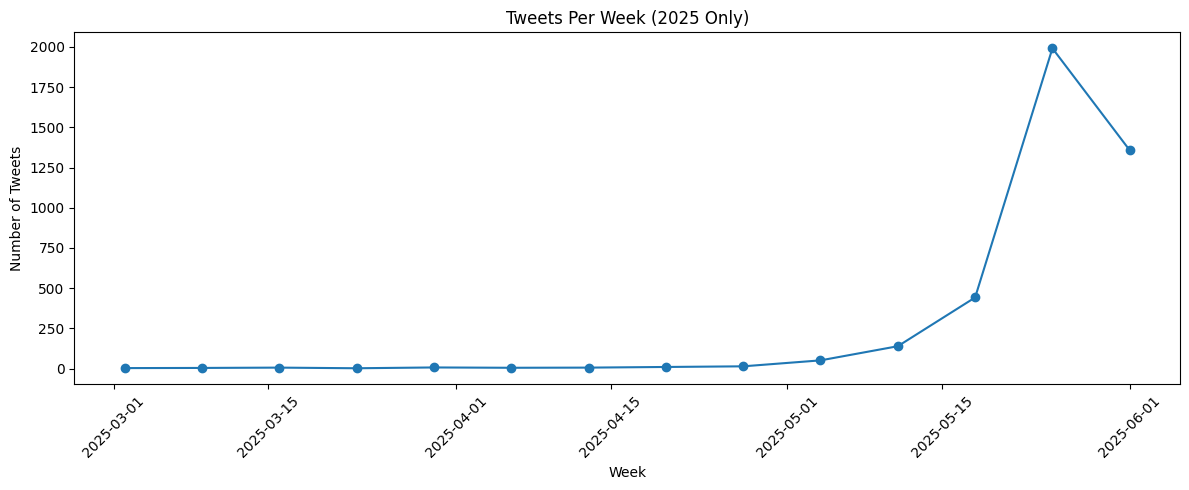

In [ ]:
# @title Tweets Per Week
# Filter only tweets from 2025
df_filtered = df[df['date'] >= pd.Timestamp('2025-03-01')]

# Set 'date' as index for resampling
df_filtered = df_filtered.set_index('date')

# Group by week and count tweets
weekly_counts = df_filtered.resample('W').size()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o')
plt.title('Tweets Per Week (2025 Only)')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-108-06d477f9f35a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Label', palette='Set1')


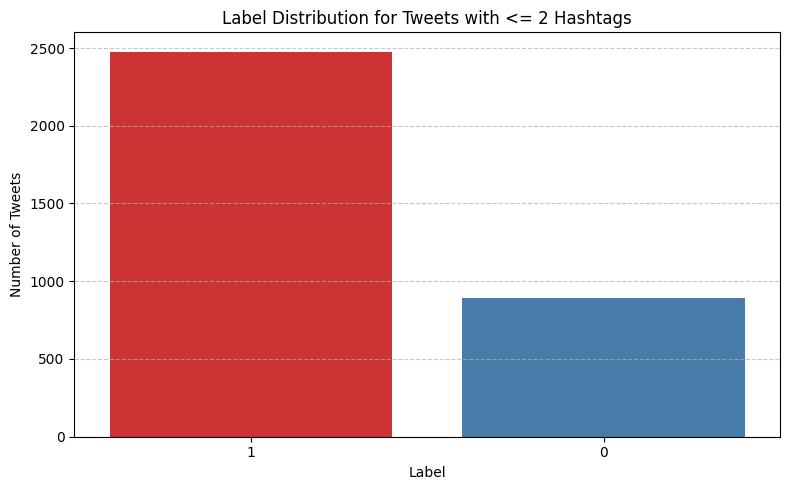

In [ ]:
#@title Hashtag Count

# Create a new column for hashtag counts
df['HashtagCount'] = df['Tweet Text'].apply(count_hashtags)

# Filter tweets with more than 4 hashtags
df_filtered = df[df['HashtagCount'] <=2]

# Plot the label distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='Label', palette='Set1')
plt.title('Label Distribution for Tweets with <= 2 Hashtags')
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


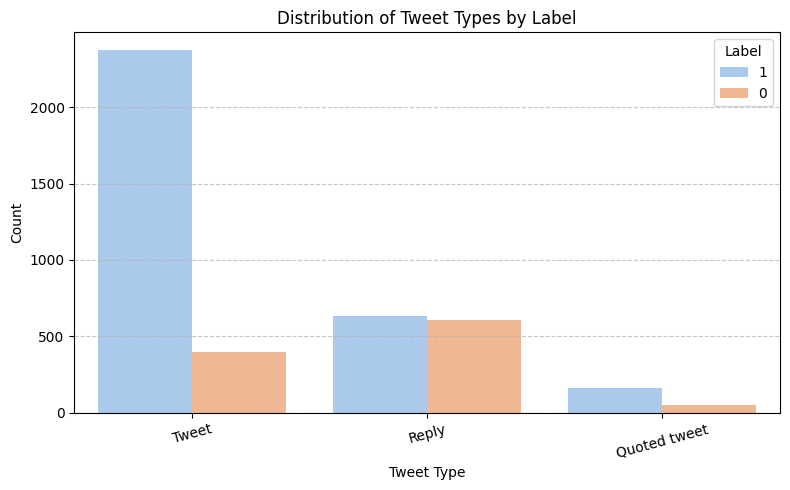

In [ ]:
#@title Tweets Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type', hue='Label', palette='pastel')

plt.title('Distribution of Tweet Types by Label')
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper right')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



100%|██████████| 132/132 [37:49<00:00, 17.20s/it]


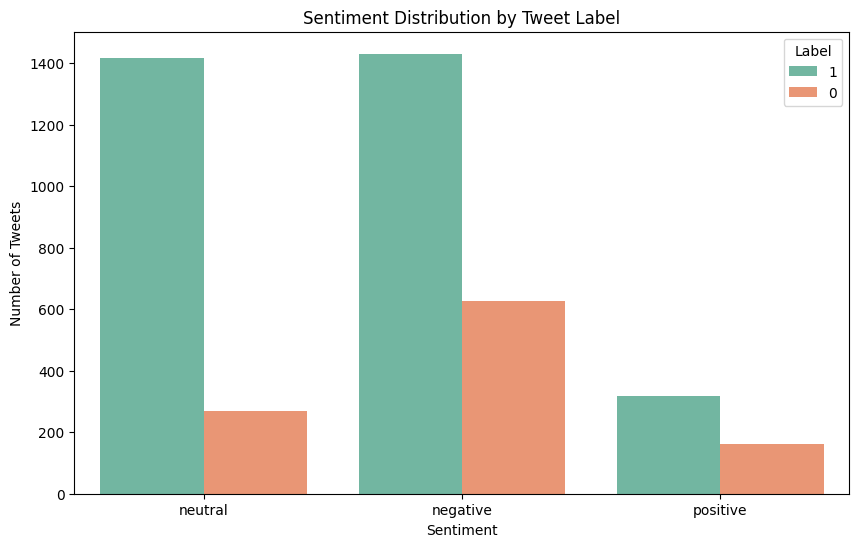

In [ ]:
#@title Sentiment Analysis
# Run sentiment analysis (this might take time if the dataset is large)
df['Sentiment'] = batch_predict(df['Tweet Text'].tolist())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Label', palette='Set2')
plt.title('Sentiment Distribution by Tweet Label')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.legend(title='Label', loc='upper right')

In [ ]:
#@title Perdicate Sentiment
# df['Sentiment'] = df['Tweet Text'].apply(predict_sentiment)

df['Sentiment'] = batch_predict(df['Tweet Text'].tolist(), batch_size=32)


100%|██████████| 312/312 [1:06:01<00:00, 12.70s/it]


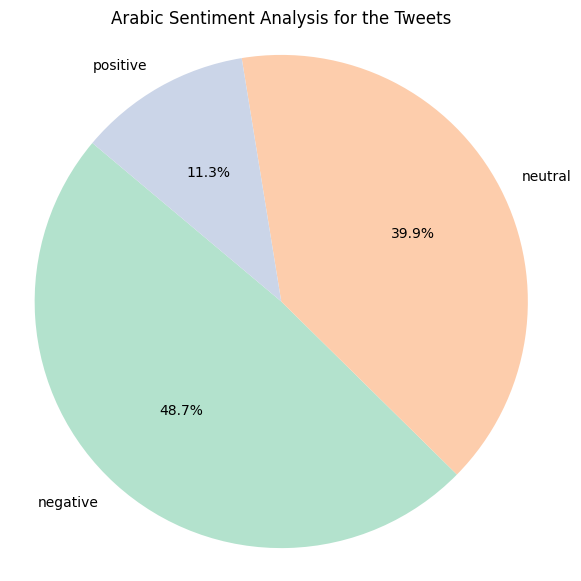

In [ ]:

# @title Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index.tolist()
counts = sentiment_counts.values.tolist()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title("Arabic Sentiment Analysis for the Tweets")
plt.axis('equal')
plt.show()

In [ ]:
#@title Hate Speech Detection
df['HateSpeech'] = batch_predict_hate(df['Tweet Text'].tolist(), batch_size=64)

100%|██████████| 66/66 [29:48<00:00, 27.09s/it]


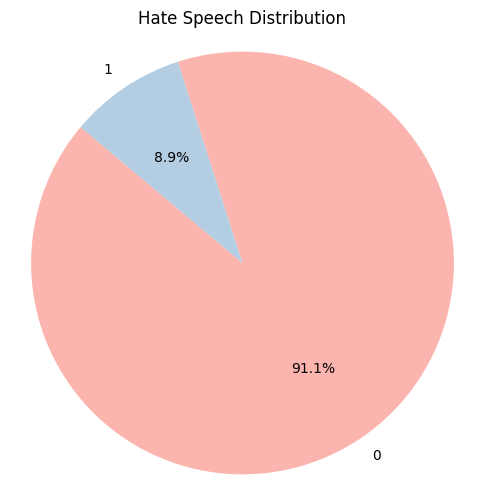

In [ ]:
#@title Hate Speach Distribution
counts = df['HateSpeech'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Hate Speech Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


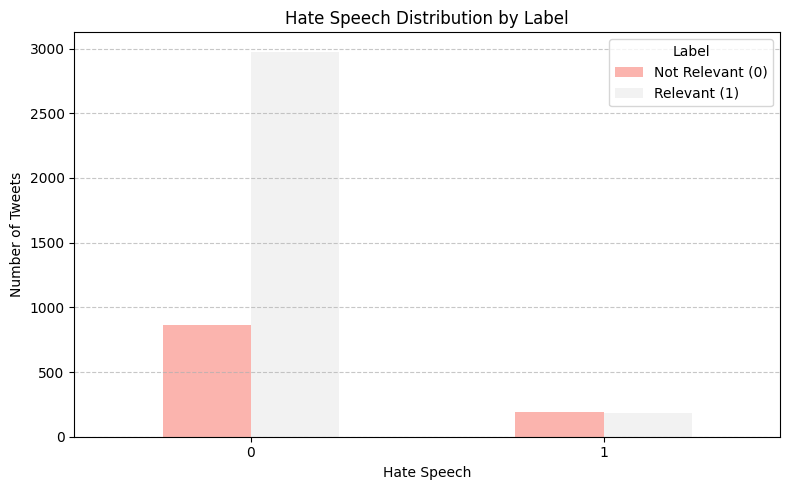

In [ ]:
#@title Hate Speech Distribution
# Create a crosstab of HateSpeech vs Label
hate_label_dist = pd.crosstab(df['HateSpeech'], df['Label'])

# Plot
hate_label_dist.plot(
    kind='bar',
    stacked=False,
    figsize=(8, 5),
    colormap='Pastel1'
)

plt.title("Hate Speech Distribution by Label")
plt.xlabel("Hate Speech")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Not Relevant (0)', 'Relevant (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#@title Extract Named Entites
from concurrent.futures import ThreadPoolExecutor

# Use ThreadPool to speed up processing
texts = df['Tweet Text'].tolist()

with ThreadPoolExecutor(max_workers=8) as executor:
    named_entities = list(executor.map(extract_entities_stanza, texts))

df['Named Entities'] = named_entities


In [ ]:
#@title Some Named Entities
df['Named Entities'].sample(4)

4344                                      [دمشق]
4064                                      [عكار]
4642    [قوات سوريا الديمقراطية, الدولة السورية]
3004                                          []
Name: Named Entities, dtype: object

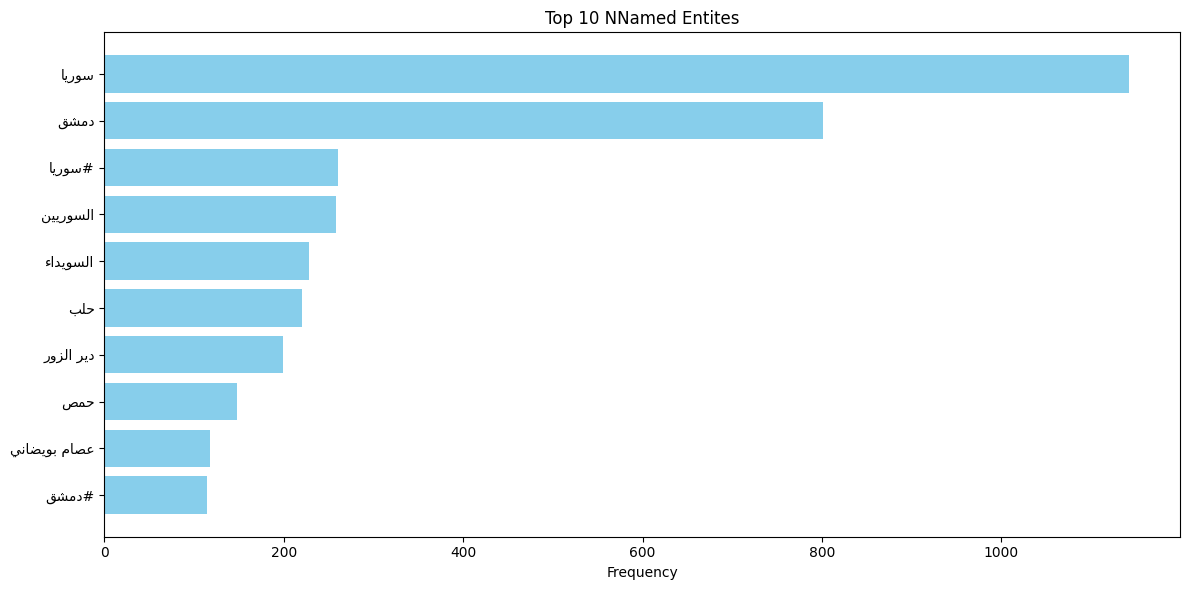

In [ ]:
#@title Top Named Entities
# Flatten all named entities from the dataframe column into a single list
all_entities = [ent for sublist in df['Named Entities'] for ent in sublist]

# Count frequency of each entity
entity_counts = Counter(all_entities)

# Get top 10 entities and their counts
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)

# Reshape and reorder Arabic entity labels for correct display
reshaped_entities = [get_display(arabic_reshaper.reshape(ent)) for ent in entities]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(reshaped_entities[::-1], counts[::-1], color='skyblue')  # reversed for descending order
plt.xlabel('Frequency')
plt.title("Top 10 NNamed Entites")
plt.tight_layout()
plt.show()


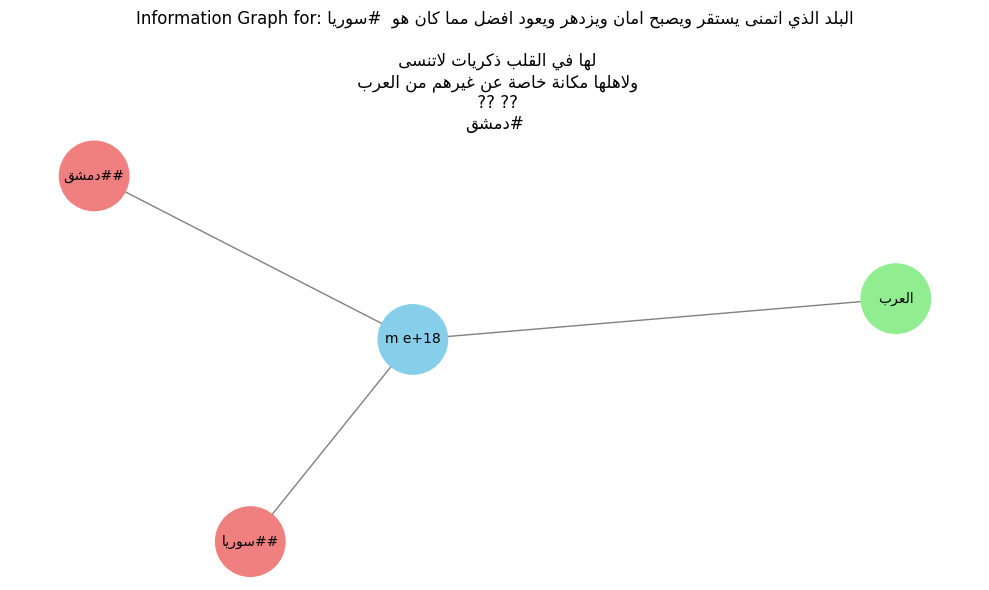

In [ ]:
#@title Message Attribute Graph for un relevant tweet
import networkx as nx
import matplotlib.pyplot as plt
import random
import arabic_reshaper
from bidi.algorithm import get_display

# Choose a single tweet randomly from your dataframe
random.seed(2342)
random_idx = random.choice(df.index)

irrelevant_df = df[df['Label'] == 0]

row = irrelevant_df.sample(1).iloc[0]

# Determine the entity column name
if 'Named Entities' in df.columns:
    entity_col = 'Named Entities'
elif 'entities' in df.columns:
    entity_col = 'entities'
else:
    raise ValueError("No entity column found; please check your dataframe")

G = nx.Graph()
# Create node for the tweet
tweet_node = f"m {str(row['Tweet ID'])[-4:]}"  # last 4 chars of Tweet ID
G.add_node(tweet_node, label='tweet', color='skyblue')

# Add entity nodes and edges
entities = row.get(entity_col, [])
if not isinstance(entities, list):
    entities = []

for entity in entities:
    if isinstance(entity, (tuple, list)):
        entity_text = str(entity[0]).strip()
    else:
        entity_text = str(entity).strip()

    # Reshape and reorder Arabic text for correct display
    reshaped_text = arabic_reshaper.reshape(entity_text)
    display_text = get_display(reshaped_text)

    G.add_node(display_text, label='entity', color='lightgreen')
    G.add_edge(tweet_node, display_text)

# Add hashtag nodes and edges
hashtags = row.get('Hashtags', [])
if not isinstance(hashtags, list):
    if isinstance(hashtags, str):
        if ',' in hashtags:
            hashtags = [h.strip() for h in hashtags.split(',') if h.strip()]
        else:
            hashtags = [h.strip() for h in hashtags.split() if h.strip()]
    else:
        hashtags = []

for hashtag in hashtags:
    hashtag_text = f"#{hashtag.strip().lower()}"
    reshaped_text = arabic_reshaper.reshape(hashtag_text)
    display_text = get_display(reshaped_text)

    G.add_node(display_text, label='hashtag', color='lightcoral')
    G.add_edge(tweet_node, display_text)

# Plotting the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [data['color'] for _, data in G.nodes(data=True)]

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    font_size=10,
    node_size=2500,
    edge_color='gray'
)
plt.title(f"Information Graph for: {get_display(arabic_reshaper.reshape(row['Tweet Text']))}")
plt.axis('off')
plt.tight_layout()
plt.show()


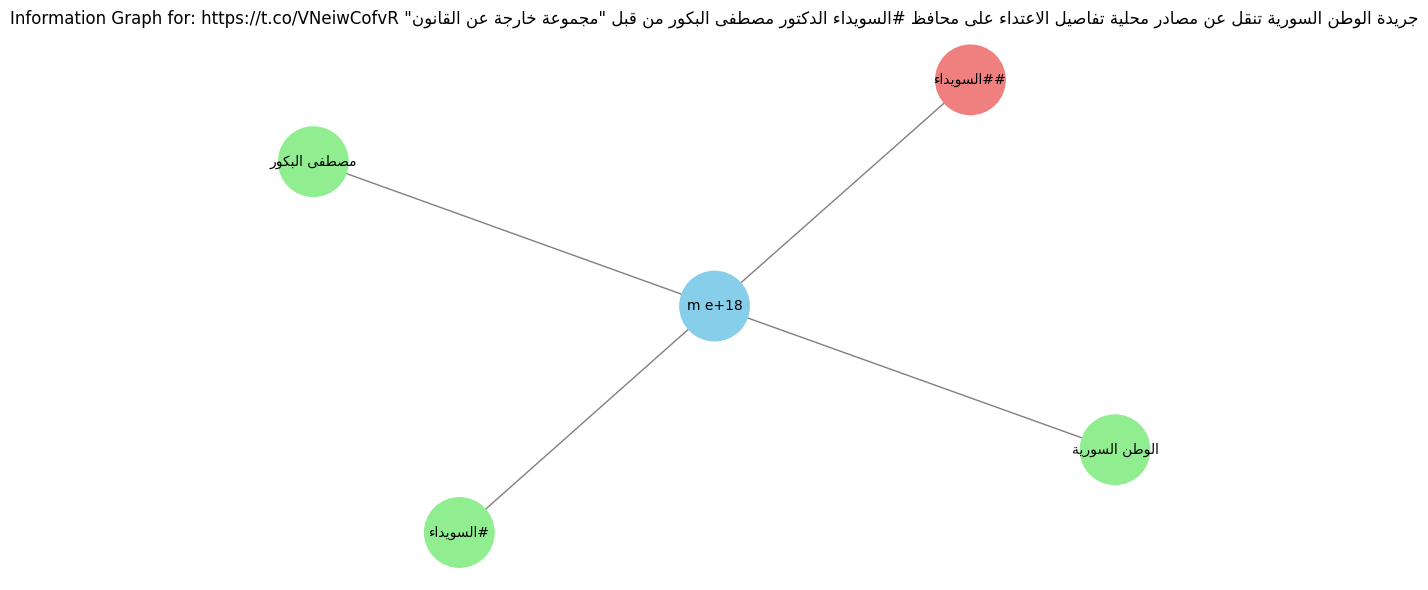

In [ ]:
#@title Message Attribute Graph for relevant tweet
import networkx as nx
import matplotlib.pyplot as plt
import random
import arabic_reshaper
from bidi.algorithm import get_display

# Choose a single tweet randomly from your dataframe
random.seed(2342)
random_idx = random.choice(df.index)

irrelevant_df = df[df['Label'] == 1]

row = irrelevant_df.sample(1).iloc[0]

# Determine the entity column name
if 'Named Entities' in df.columns:
    entity_col = 'Named Entities'
elif 'entities' in df.columns:
    entity_col = 'entities'
else:
    raise ValueError("No entity column found; please check your dataframe")

G = nx.Graph()
# Create node for the tweet
tweet_node = f"m {str(row['Tweet ID'])[-4:]}"  # last 4 chars of Tweet ID
G.add_node(tweet_node, label='tweet', color='skyblue')

# Add entity nodes and edges
entities = row.get(entity_col, [])
if not isinstance(entities, list):
    entities = []

for entity in entities:
    if isinstance(entity, (tuple, list)):
        entity_text = str(entity[0]).strip()
    else:
        entity_text = str(entity).strip()

    # Reshape and reorder Arabic text for correct display
    reshaped_text = arabic_reshaper.reshape(entity_text)
    display_text = get_display(reshaped_text)

    G.add_node(display_text, label='entity', color='lightgreen')
    G.add_edge(tweet_node, display_text)

# Add hashtag nodes and edges
hashtags = row.get('Hashtags', [])
if not isinstance(hashtags, list):
    if isinstance(hashtags, str):
        if ',' in hashtags:
            hashtags = [h.strip() for h in hashtags.split(',') if h.strip()]
        else:
            hashtags = [h.strip() for h in hashtags.split() if h.strip()]
    else:
        hashtags = []

for hashtag in hashtags:
    hashtag_text = f"#{hashtag.strip().lower()}"
    reshaped_text = arabic_reshaper.reshape(hashtag_text)
    display_text = get_display(reshaped_text)

    G.add_node(display_text, label='hashtag', color='lightcoral')
    G.add_edge(tweet_node, display_text)

# Plotting the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [data['color'] for _, data in G.nodes(data=True)]

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    font_size=10,
    node_size=2500,
    edge_color='gray'
)
plt.title(f"Information Graph for: {get_display(arabic_reshaper.reshape(row['Tweet Text']))}")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#@title Remove Non Arabic Tweets
# Keep only Arabic tweets based on the 'Language' column
df = df[df['Language'] == 'ar'].reset_index(drop=True)


In [ ]:
# @title Saving The Data Set
df.to_csv("processed_labeled.csv")

# Fast Text Epreiments

In [1]:
#@title Install Fast Text Model
# !pip install fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
!gunzip cc.ar.300.vec.gz


--2025-06-13 15:09:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1272365870 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ar.300.vec.gz’

cc.ar.300.vec.gz    100%[===================>]   1.18G   152MB/s    in 6.7s    

2025-06-13 15:09:23 (181 MB/s) - ‘cc.ar.300.vec.gz’ saved [1272365870/1272365870]



In [11]:
#@title Load the model

# Load the .vec file (pre-trained FastText embeddings in text format)
fasttext_model = KeyedVectors.load_word2vec_format('cc.ar.300.vec', binary=False, encoding='utf-8')


## E1 Text Embedding with Fast Text


In [37]:
#@title Embedding the tweets

# Apply embedding to entire DataFrame column, create new column with vectors
df['tweet_embedding'] = df['Tweet Text'].apply(lambda text: embed_tweet(text, fasttext_model))

# Example: check vector shape for first tweet
print(df['tweet_embedding'].iloc[0].shape)


(300,)


### Sipliting the Dataset

In [38]:
X = np.vstack(df['tweet_embedding'].values)
y = df['Label'].values


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### K Nearest Neighbor Classifier

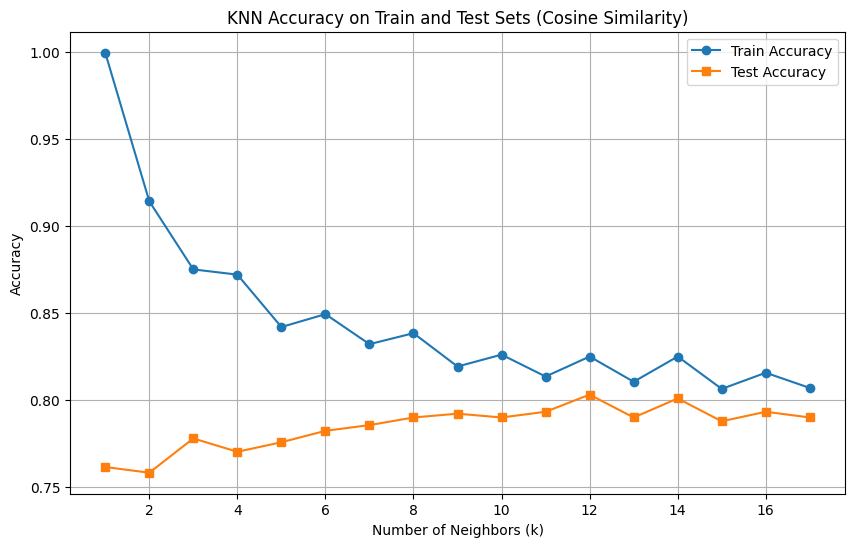

In [ ]:
#@title KNN with K from 1 to root of feature size
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


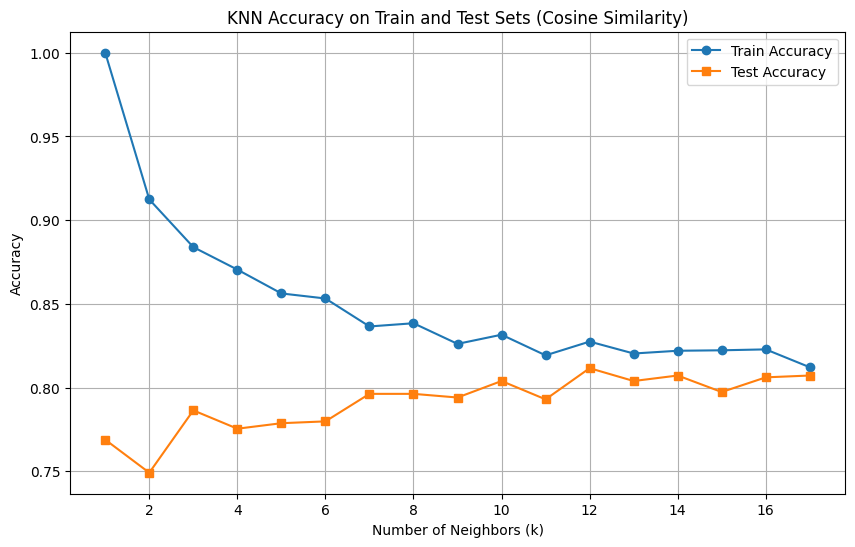

In [ ]:
#@title KNN with Cosine Similarity
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


Best k based on test accuracy: 12


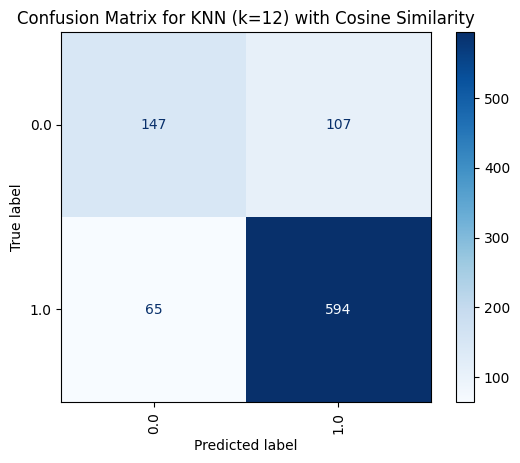

In [ ]:
#@title Confuison Matrix for KNN with Cosine Similarity
# Get the best k based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k based on test accuracy: {best_k}")

# Train final model with best_k
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
best_knn.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f'Confusion Matrix for KNN (k={best_k}) with Cosine Similarity')
plt.grid(False)
plt.show()


#### Grid Search for the best Params with f1 Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7474


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      1154
         1.0       0.86      0.91      0.89      2498

    accuracy                           0.84      3652
   macro avg       0.82      0.80      0.81      3652
weighted avg       0.84      0.84      0.84      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61       254
         1.0       0.84      0.88      0.86       659

    accuracy                           0.80       913
   macro avg       0.75      0.73      0.74       913
weighted avg       0.79      0.80      0.79       913



<Figure size 600x500 with 0 Axes>

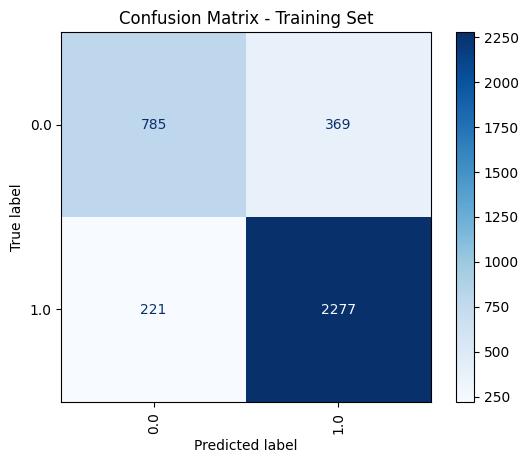

<Figure size 600x500 with 0 Axes>

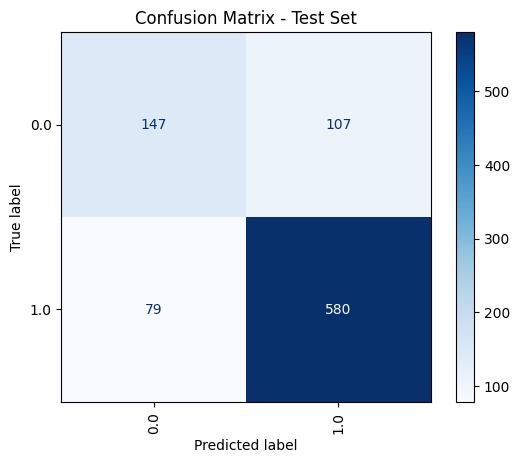

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

#### Grid Search for the best Params with recall Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7377


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      1154
         1.0       0.86      0.91      0.89      2498

    accuracy                           0.84      3652
   macro avg       0.82      0.80      0.81      3652
weighted avg       0.84      0.84      0.84      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61       254
         1.0       0.84      0.88      0.86       659

    accuracy                           0.80       913
   macro avg       0.75      0.73      0.74       913
weighted avg       0.79      0.80      0.79       913



<Figure size 600x500 with 0 Axes>

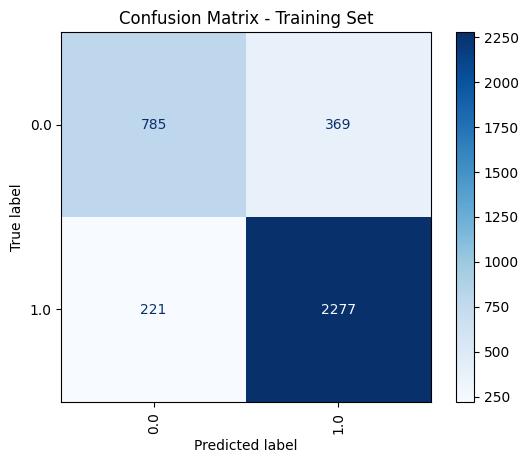

<Figure size 600x500 with 0 Axes>

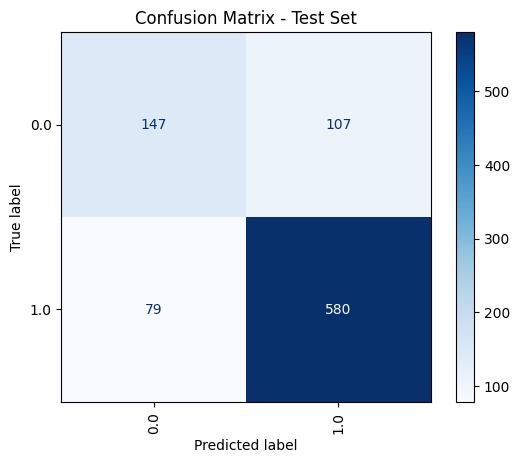

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

### SVM

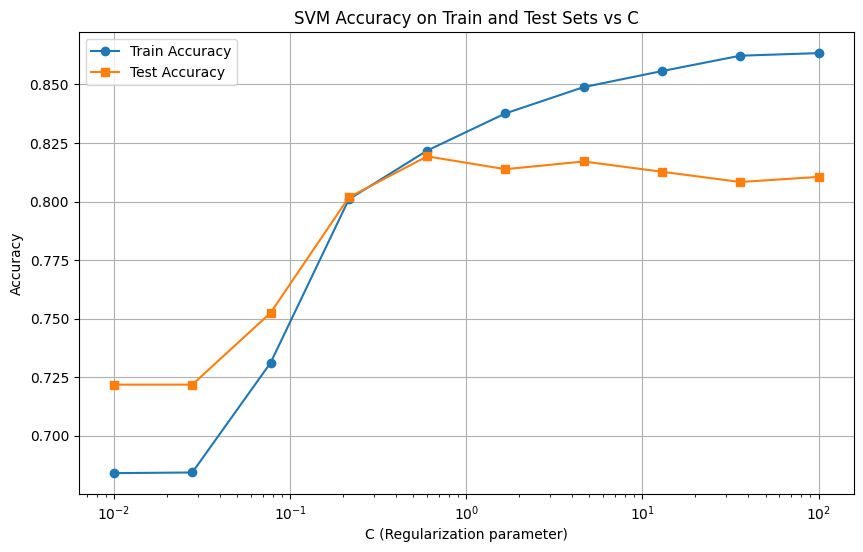

In [ ]:
#@title SVM with Linear kernel (jsut to show a base line )
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a range of C values to try (log scale)
C_values = np.logspace(-2, 2, 10)  # 0.01 to 100

train_accuracies = []
test_accuracies = []

for C in C_values:
    svm = SVC(C=C, kernel='linear')  # using linear kernel, you can try others like 'rbf'
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy on Train and Test Sets vs C')
plt.legend()
plt.grid(True)
plt.show()


#### Grid Search  with f1 concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7825


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      1154
         1.0       0.88      0.91      0.89      2498

    accuracy                           0.85      3652
   macro avg       0.83      0.82      0.83      3652
weighted avg       0.85      0.85      0.85      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       254
         1.0       0.87      0.87      0.87       659

    accuracy                           0.81       913
   macro avg       0.77      0.76      0.76       913
weighted avg       0.81      0.81      0.81       913



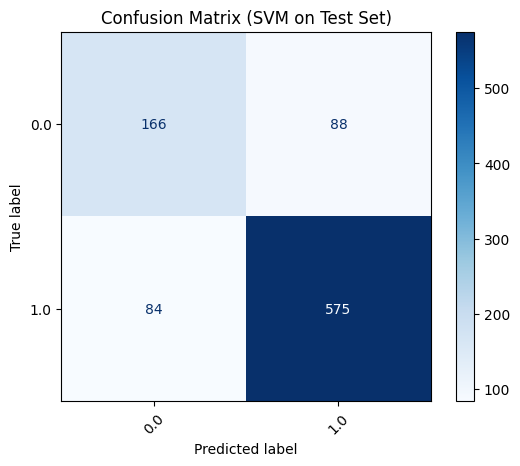

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


#### Grid Search  with Recall concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 1.0000


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

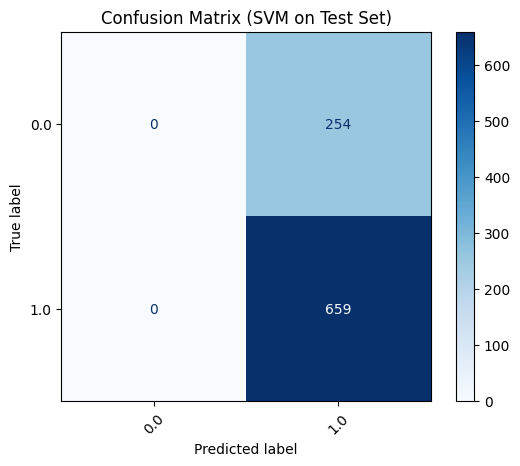

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


### Logistic Regression

In [ ]:
#@title Logistic Regression with Default Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8157
Test Accuracy: 0.8138


In [ ]:
#@title Logistic Regression with Grid Search
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],                   # L2 is commonly used
    'solver': ['liblinear', 'lbfgs'],    # liblinear for small data, lbfgs is default
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8215


In [ ]:
#@title Classification Report for Logistic Regression
from sklearn.metrics import classification_report

best_logreg = grid_search.best_estimator_

y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1154
         1.0       0.87      0.91      0.89      2498

    accuracy                           0.84      3652
   macro avg       0.82      0.80      0.81      3652
weighted avg       0.84      0.84      0.84      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.66       254
         1.0       0.86      0.88      0.87       659

    accuracy                           0.81       913
   macro avg       0.77      0.76      0.76       913
weighted avg       0.81      0.81      0.81       913



<Figure size 600x600 with 0 Axes>

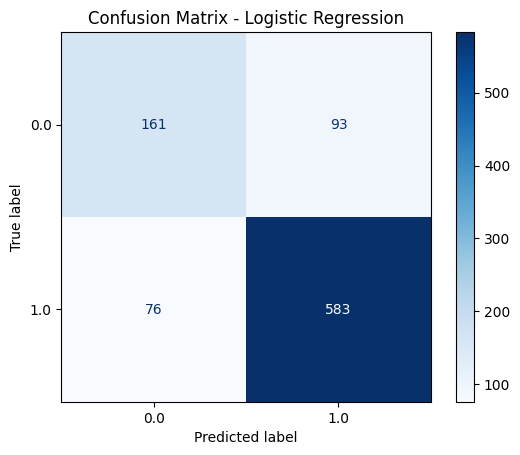

In [ ]:
#@title Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = best_logreg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_logreg.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Naive Baise

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on train and test
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Print accuracies
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.7330230010952903
Test Accuracy: 0.7634173055859803


In [ ]:
print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.60      0.47      0.53      1154
         1.0       0.78      0.85      0.81      2498

    accuracy                           0.73      3652
   macro avg       0.69      0.66      0.67      3652
weighted avg       0.72      0.73      0.72      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.59      0.47      0.52       254
         1.0       0.81      0.88      0.84       659

    accuracy                           0.76       913
   macro avg       0.70      0.67      0.68       913
weighted avg       0.75      0.76      0.75       913



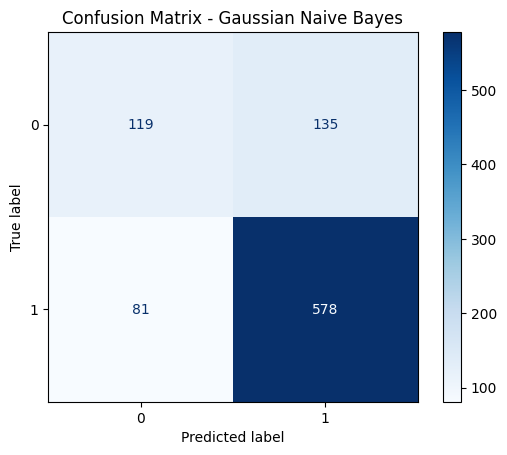

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


## Neural Network Classifier

In [40]:
#@title Define the Network Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

layers = [
    Dense(256, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),  # batch norm before activation
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(16, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(16, activation='relu'),

    Dense(2, activation='softmax')
]

model = Sequential(layers)

#
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# @title Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7100 - loss: 5.5416 - val_accuracy: 0.7218 - val_loss: 3.7510
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7994 - loss: 3.0967 - val_accuracy: 0.7218 - val_loss: 2.2050
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8183 - loss: 1.7443 - val_accuracy: 0.7218 - val_loss: 1.4083
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8324 - loss: 1.0684 - val_accuracy: 0.7240 - val_loss: 0.9394
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8236 - loss: 0.7733 - val_accuracy: 0.7568 - val_loss: 0.7167
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8200 - loss: 0.6257 - val_accuracy: 0.8116 - val_loss: 0.5871
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8166 - loss: 0.5601 - val_accuracy: 0.8291 - val_loss: 0.5253
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8145 - loss: 0.5201 - val_accuracy

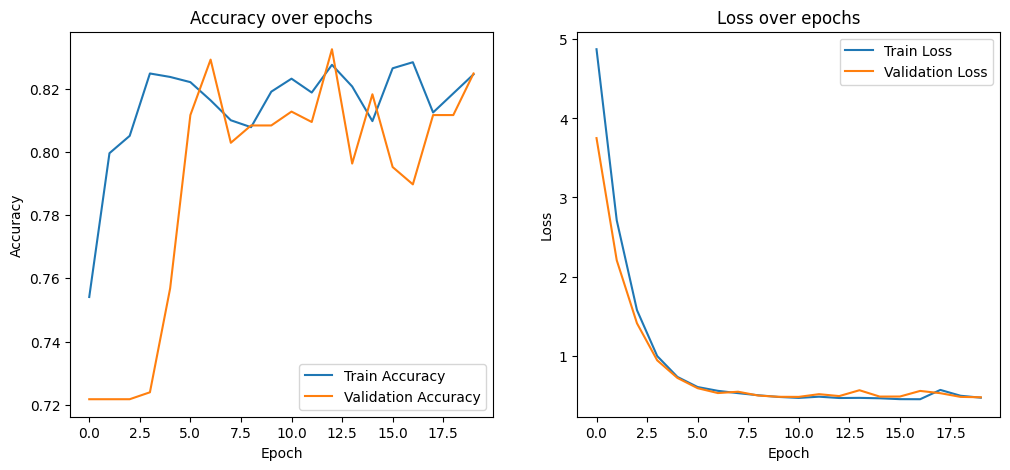

In [42]:
#@title training & validation loss
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [43]:
#@title Classification Report
# Predict classes on test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


# Predict classes on training set
y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Classification report for training set
print("Classification Report - Training Set:\n")
print(classification_report(y_train, y_train_pred, digits=4))

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report - Training Set:

              precision    recall  f1-score   support

         0.0     0.7795    0.6984    0.7367      1154
         1.0     0.8671    0.9087    0.8874      2498

    accuracy                         0.8423      3652
   macro avg     0.8233    0.8036    0.8121      3652
weighted avg     0.8394    0.8423    0.8398      3652

Classification Report:

              precision    recall  f1-score   support

         0.0     0.7061    0.6339    0.6680       254
         1.0     0.8642    0.8983    0.8810       659

    accuracy                         0.8248       913
   macro avg     0.7852    0.7661    0.7745       913
weighted avg     0.8203    0.8248    0.8217       913



<Figure size 600x600 with 0 Axes>

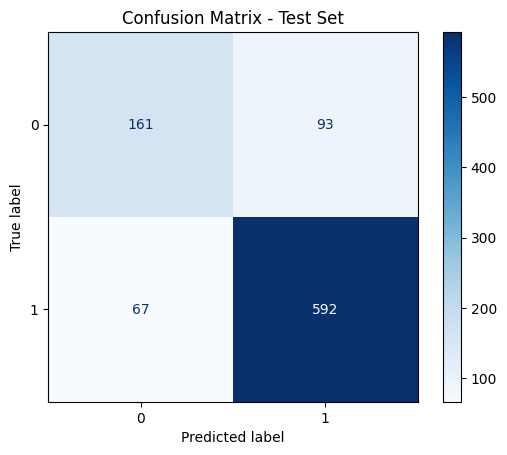

In [44]:
# @title Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()


## E2 Taking a wieght for the Named Entities

In [66]:
#@title Weighting the embeding by the named entites
import numpy as np
import ast


# Weighted Embedding Function
def embed_tweet_weighted(text, named_entities, model, ner_weight=2.0):
    words = str(text).split()  # ensure string and basic tokenization
    named_entities_set = set(named_entities if isinstance(named_entities, list) else [])

    weighted_vectors = []
    weights = []

    for word in words:
        # Get vector
        word_vector = model[word] if word in model.key_to_index else np.zeros(model.vector_size)
        # Weight: more for NER
        weight = ner_weight if word in named_entities_set else 1.0

        weighted_vectors.append(word_vector * weight)
        weights.append(weight)

    if weighted_vectors:
        tweet_vector = np.sum(weighted_vectors, axis=0) / (np.sum(weights) or 1.0)
    else:
        tweet_vector = np.zeros(model.vector_size)

    return tweet_vector

#  Add new column with weighted embeddings
df['weighted_tweet_embedding'] = df.apply(
    lambda row: embed_tweet_weighted(row['Tweet Text'], row['Named Entities'], fasttext_model,2),
    axis=1
)

# Check
print(df['weighted_tweet_embedding'].iloc[0].shape)


(300,)


In [67]:
#@title Split the DF
X = np.vstack(df['weighted_tweet_embedding'].values)
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### K Nearest Neighbor Classifier

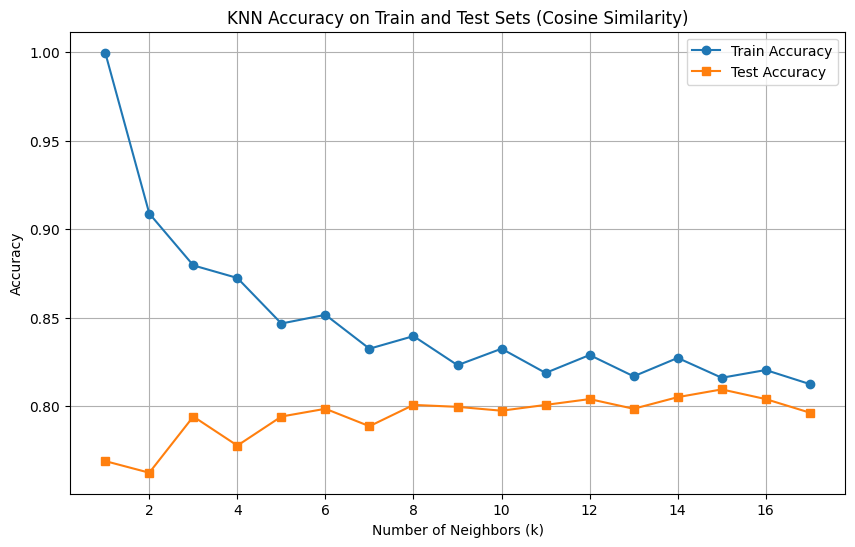

In [ ]:
#@title KNN with K from 1 to root of feature size
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


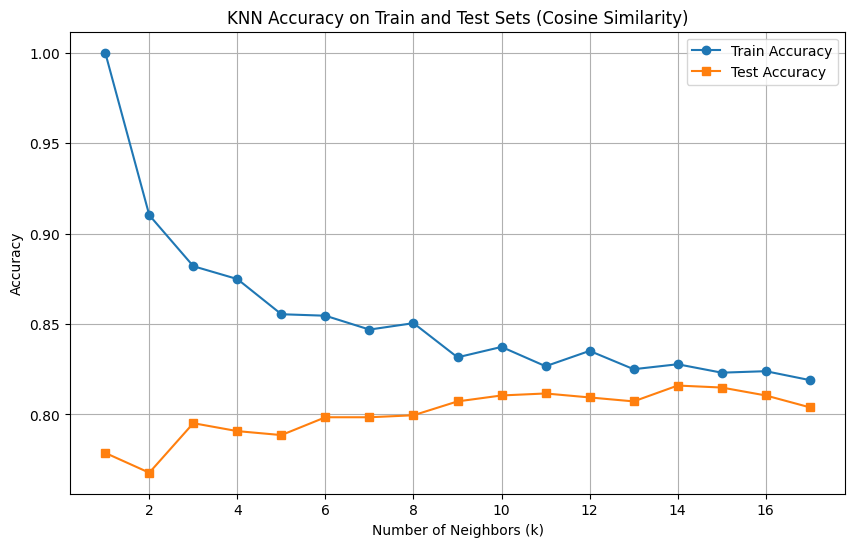

In [ ]:
#@title KNN with Cosine Similarity
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


Best k based on test accuracy: 14


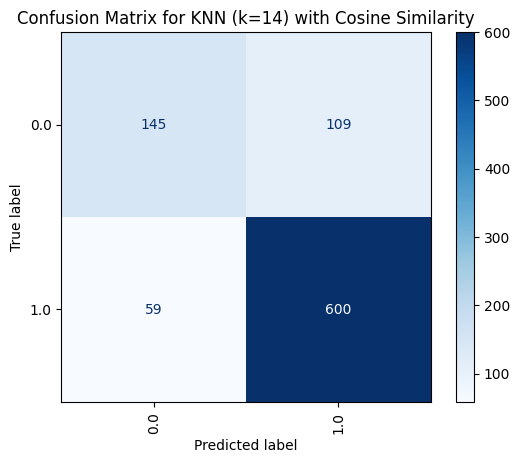

In [ ]:
#@title Confuison Matrix for KNN with Cosine Similarity
# Get the best k based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k based on test accuracy: {best_k}")

# Train final model with best_k
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
best_knn.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f'Confusion Matrix for KNN (k={best_k}) with Cosine Similarity')
plt.grid(False)
plt.show()


#### Grid Search for the best Params with f1 Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7472


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      1154
         1.0       0.87      0.92      0.89      2498

    accuracy                           0.85      3652
   macro avg       0.83      0.81      0.82      3652
weighted avg       0.85      0.85      0.85      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63       254
         1.0       0.85      0.87      0.86       659

    accuracy                           0.80       913
   macro avg       0.75      0.74      0.75       913
weighted avg       0.80      0.80      0.80       913



<Figure size 600x500 with 0 Axes>

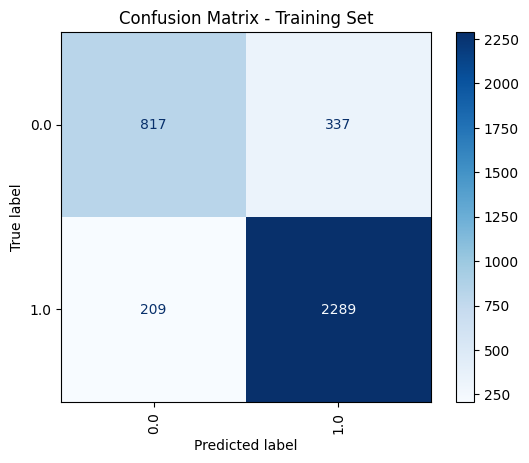

<Figure size 600x500 with 0 Axes>

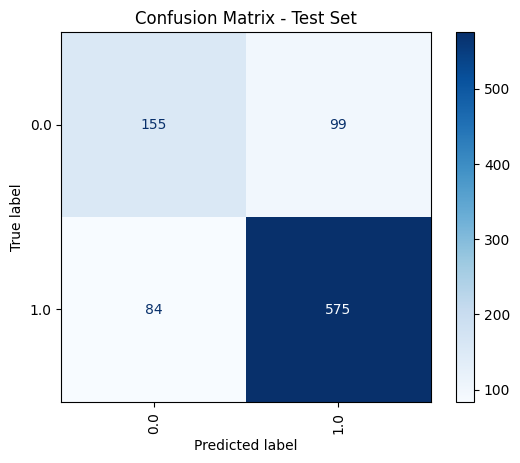

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

#### Grid Search for the best Params with recall Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7388


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      1154
         1.0       0.87      0.92      0.89      2498

    accuracy                           0.85      3652
   macro avg       0.83      0.81      0.82      3652
weighted avg       0.85      0.85      0.85      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63       254
         1.0       0.85      0.87      0.86       659

    accuracy                           0.80       913
   macro avg       0.75      0.74      0.75       913
weighted avg       0.80      0.80      0.80       913



<Figure size 600x500 with 0 Axes>

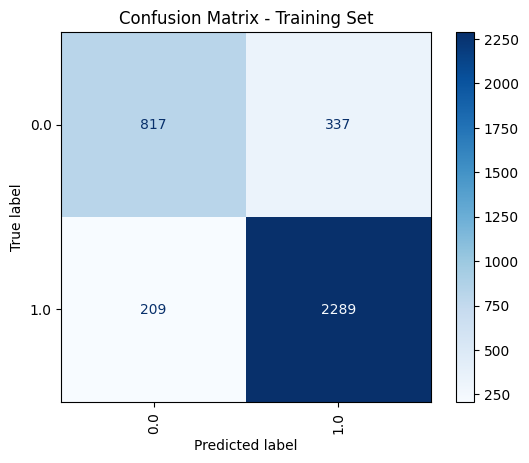

<Figure size 600x500 with 0 Axes>

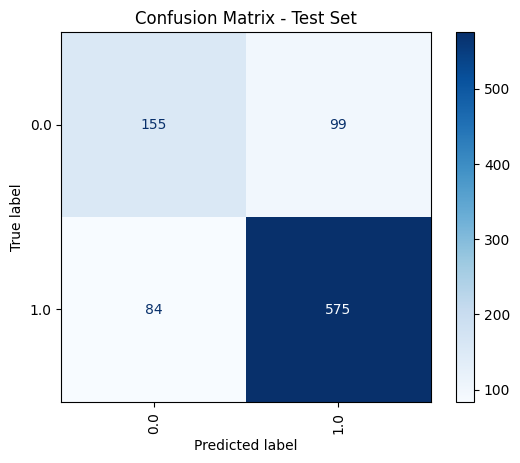

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

### SVM

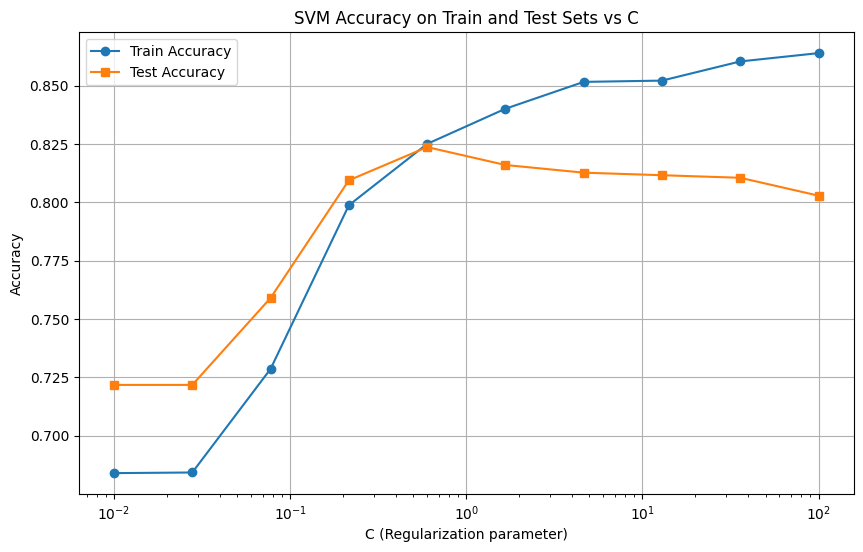

In [ ]:
#@title SVM with Linear kernel (jsut to show a base line )
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a range of C values to try (log scale)
C_values = np.logspace(-2, 2, 10)  # 0.01 to 100

train_accuracies = []
test_accuracies = []

for C in C_values:
    svm = SVC(C=C, kernel='linear')  # using linear kernel, you can try others like 'rbf'
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy on Train and Test Sets vs C')
plt.legend()
plt.grid(True)
plt.show()


#### Grid Search  with f1 concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7828


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      1154
         1.0       0.88      0.91      0.89      2498

    accuracy                           0.85      3652
   macro avg       0.83      0.82      0.83      3652
weighted avg       0.85      0.85      0.85      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       254
         1.0       0.87      0.87      0.87       659

    accuracy                           0.81       913
   macro avg       0.76      0.76      0.76       913
weighted avg       0.81      0.81      0.81       913



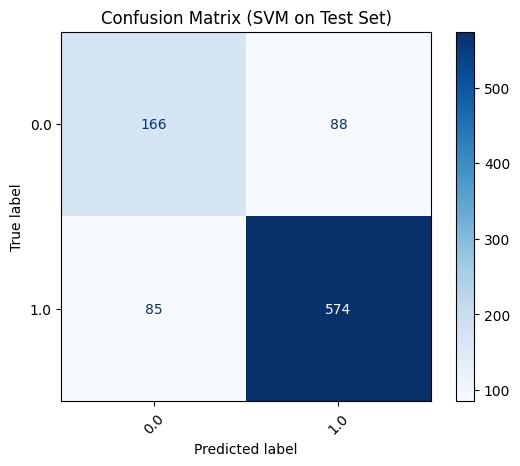

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


#### Grid Search  with Recall concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 1.0000


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

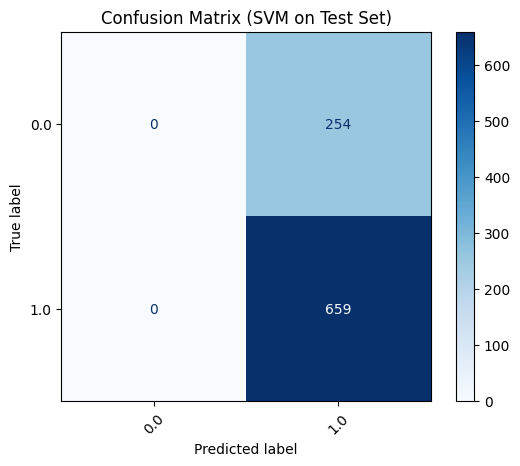

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


### Logistic Regression

In [ ]:
#@title Logistic Regression with Default Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8168
Test Accuracy: 0.8149


In [ ]:
#@title Logistic Regression with Grid Search
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],                   # L2 is commonly used
    'solver': ['liblinear', 'lbfgs'],    # liblinear for small data, lbfgs is default
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8231


In [ ]:
#@title Classification Report for Logistic Regression
from sklearn.metrics import classification_report

best_logreg = grid_search.best_estimator_

y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1154
         1.0       0.87      0.91      0.89      2498

    accuracy                           0.84      3652
   macro avg       0.82      0.80      0.81      3652
weighted avg       0.84      0.84      0.84      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       254
         1.0       0.86      0.89      0.87       659

    accuracy                           0.81       913
   macro avg       0.77      0.76      0.76       913
weighted avg       0.81      0.81      0.81       913



<Figure size 600x600 with 0 Axes>

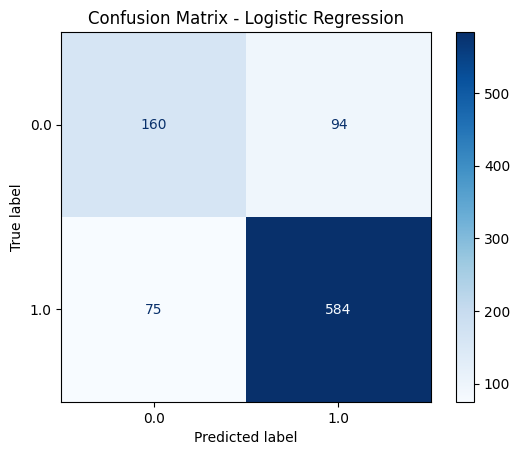

In [ ]:
#@title Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = best_logreg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_logreg.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Naive Baise

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on train and test
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Print accuracies
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.7294633077765608
Test Accuracy: 0.76013143483023


In [ ]:
print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.59      0.46      0.52      1154
         1.0       0.77      0.86      0.81      2498

    accuracy                           0.73      3652
   macro avg       0.68      0.66      0.66      3652
weighted avg       0.72      0.73      0.72      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.59      0.46      0.51       254
         1.0       0.81      0.88      0.84       659

    accuracy                           0.76       913
   macro avg       0.70      0.67      0.68       913
weighted avg       0.75      0.76      0.75       913



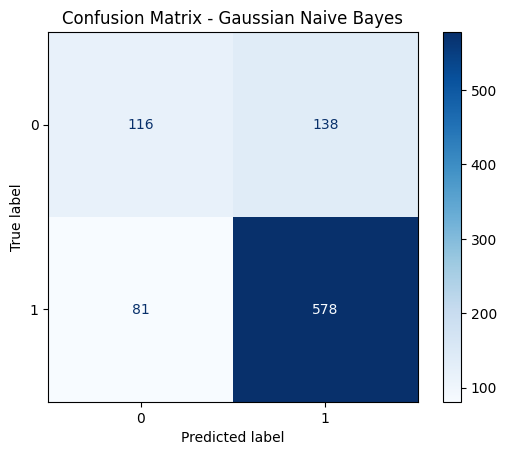

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


## Neural Network Classifier

In [73]:
#@title Define the Network Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

layers = [
    Dense(256, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),  # batch norm before activation
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(16, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(16, activation='relu'),

    Dense(2, activation='softmax')
]

model = Sequential(layers)

#
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# @title Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7066 - loss: 5.2437 - val_accuracy: 0.7218 - val_loss: 2.8264
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8016 - loss: 2.2307 - val_accuracy: 0.7218 - val_loss: 1.4470
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8097 - loss: 1.1043 - val_accuracy: 0.7218 - val_loss: 0.9033
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8049 - loss: 0.7021 - val_accuracy: 0.7382 - val_loss: 0.6901
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8227 - loss: 0.5757 - val_accuracy: 0.8182 - val_loss: 0.5413
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8305 - loss: 0.4947 - val_accuracy: 0.7908 - val_loss: 0.5285
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8071 - loss: 0.5125 - val_accuracy: 0.8248 - val_loss: 0.4833
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8162 - loss: 0.4748 - val_acc

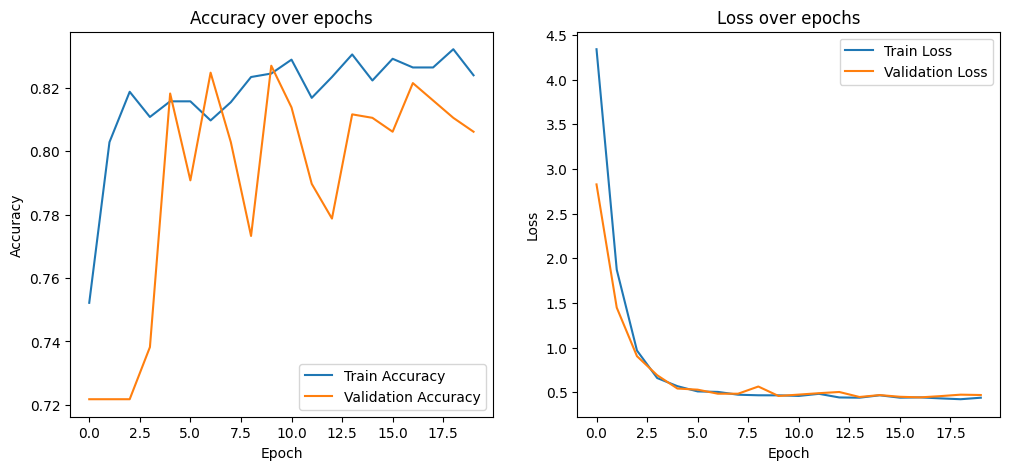

In [75]:
#@title training & validation loss
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [76]:
#@title Classification Report
# Predict classes on test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


# Predict classes on training set
y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Classification report for training set
print("Classification Report - Training Set:\n")
print(classification_report(y_train, y_train_pred, digits=4))

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report - Training Set:

              precision    recall  f1-score   support

         0.0     0.8004    0.6326    0.7067      1154
         1.0     0.8453    0.9271    0.8843      2498

    accuracy                         0.8341      3652
   macro avg     0.8228    0.7799    0.7955      3652
weighted avg     0.8311    0.8341    0.8282      3652

Classification Report:

              precision    recall  f1-score   support

         0.0     0.6935    0.5433    0.6093       254
         1.0     0.8375    0.9074    0.8711       659

    accuracy                         0.8061       913
   macro avg     0.7655    0.7254    0.7402       913
weighted avg     0.7975    0.8061    0.7982       913



<Figure size 600x600 with 0 Axes>

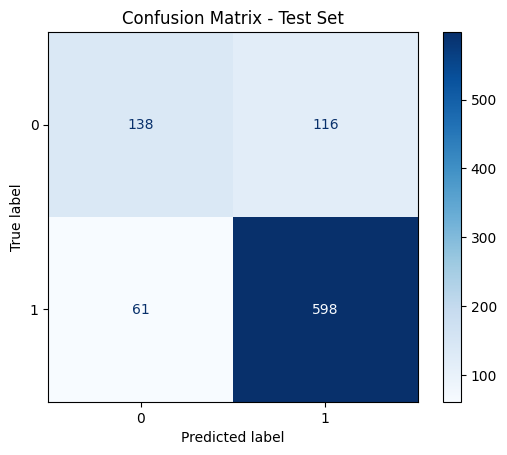

In [77]:
# @title Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()


## E3 Try Embedding Only the Named Entities

In [29]:
#@title Embedding Using Only Named Entities
import numpy as np
import ast

def embed_named_entities(named_entities_str, model):
    try:
        # Parse string list to Python list
        named_entities = ast.literal_eval(named_entities_str) if named_entities_str else []
    except (ValueError, SyntaxError):
        named_entities = []

    word_vectors = []
    for entity in named_entities:
        if entity in model.key_to_index:
            word_vectors.append(model[entity])
        else:
            word_vectors.append(np.zeros(model.vector_size))

    if word_vectors:
        # Average embeddings of all named entities
        entities_vector = np.mean(word_vectors, axis=0)
    else:
        # If no named entities, zero vector
        entities_vector = np.zeros(model.vector_size)

    return entities_vector

# Apply embedding using only named entities
df['named_entities_embedding'] = df['Named Entities'].apply(lambda x: embed_named_entities(x, fasttext_model))

# Check
print(df['named_entities_embedding'].iloc[0].shape)


(300,)


### split the DF

In [30]:
X = np.vstack(df['named_entities_embedding'].values)
y = df['Label'].values


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### K Nearest Neighbor Classifier

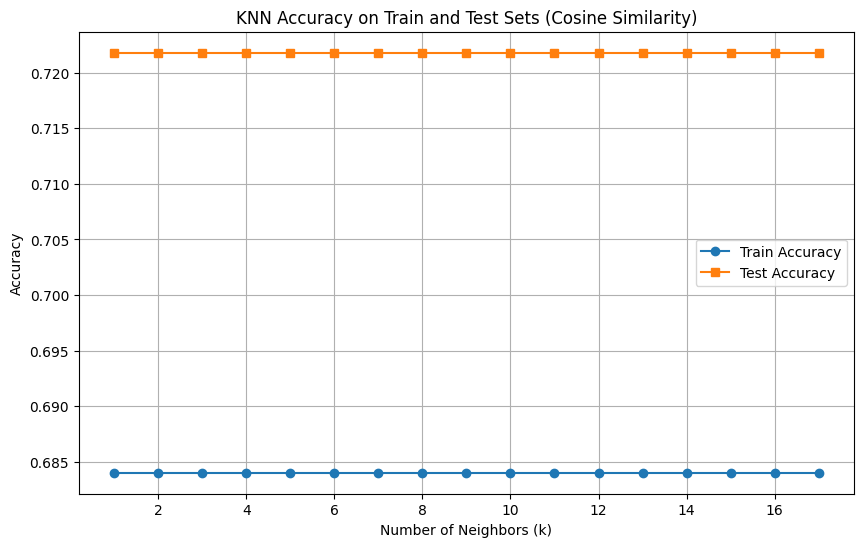

In [ ]:
#@title KNN with K from 1 to root of feature size
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


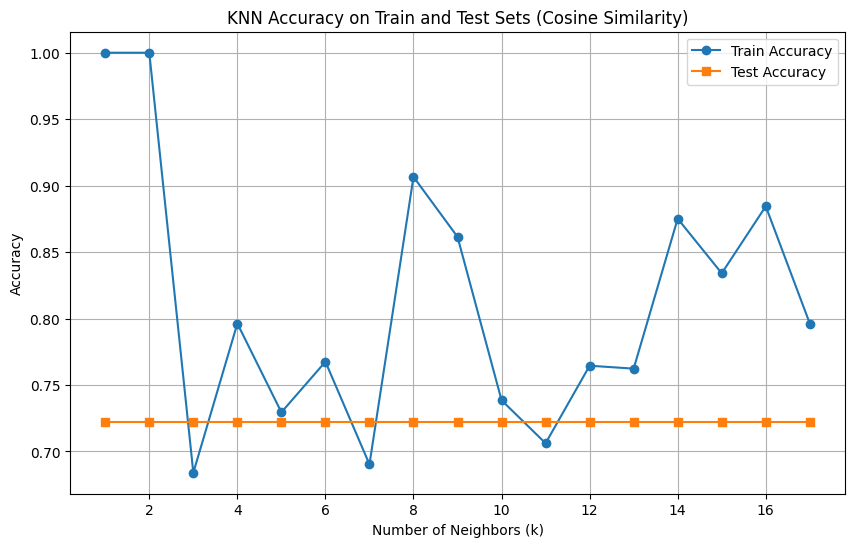

In [ ]:
#@title KNN with Cosine Similarity
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


Best k based on test accuracy: 1


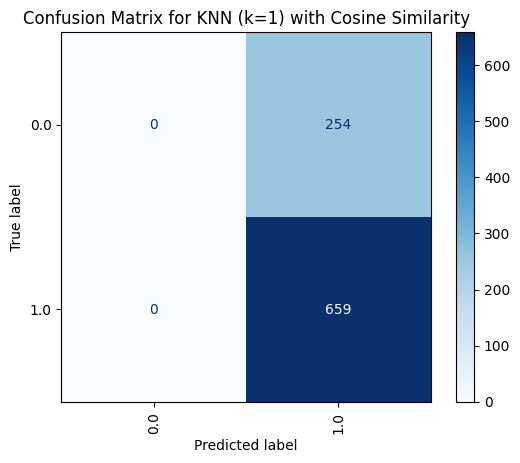

In [ ]:
#@title Confuison Matrix for KNN with Cosine Similarity
# Get the best k based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k based on test accuracy: {best_k}")

# Train final model with best_k
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
best_knn.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f'Confusion Matrix for KNN (k={best_k}) with Cosine Similarity')
plt.grid(False)
plt.show()


#### Grid Search for the best Params with f1 Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy: 0.4062


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04      1154
         1.0       0.69      1.00      0.82      2498

    accuracy                           0.69      3652
   macro avg       0.84      0.51      0.43      3652
weighted avg       0.79      0.69      0.57      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

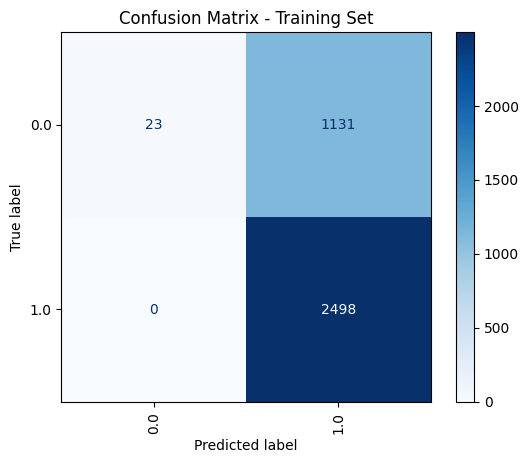

<Figure size 600x500 with 0 Axes>

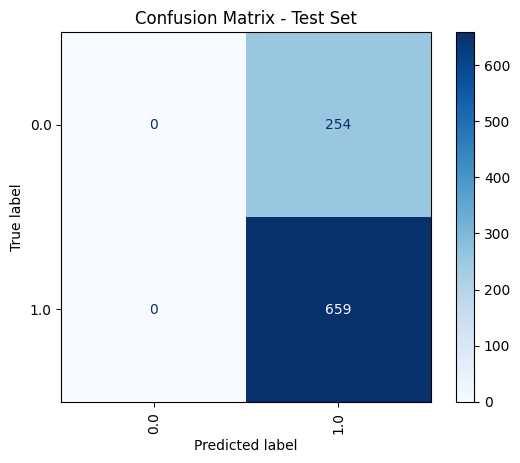

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

#### Grid Search for the best Params with recall Concern

In [ ]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [ ]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy: 0.5000


In [ ]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04      1154
         1.0       0.69      1.00      0.82      2498

    accuracy                           0.69      3652
   macro avg       0.84      0.51      0.43      3652
weighted avg       0.79      0.69      0.57      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

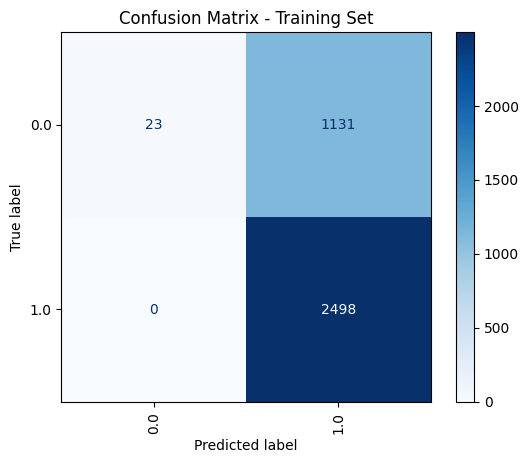

<Figure size 600x500 with 0 Axes>

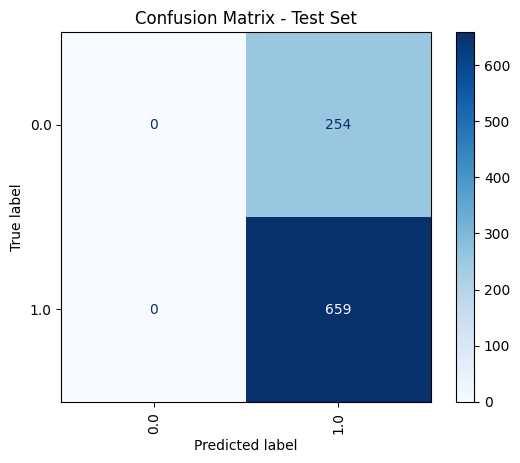

In [ ]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

### SVM

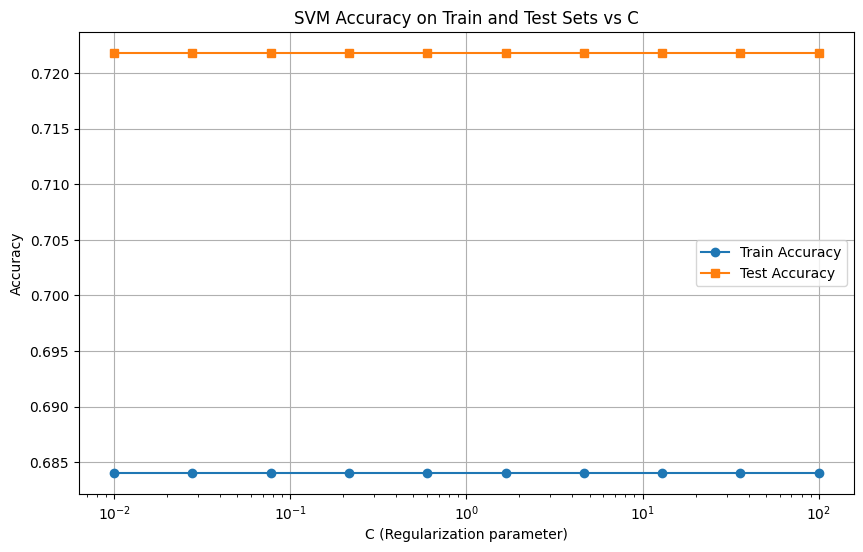

In [ ]:
#@title SVM with Linear kernel (jsut to show a base line )
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a range of C values to try (log scale)
C_values = np.logspace(-2, 2, 10)  # 0.01 to 100

train_accuracies = []
test_accuracies = []

for C in C_values:
    svm = SVC(C=C, kernel='linear')  # using linear kernel, you can try others like 'rbf'
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy on Train and Test Sets vs C')
plt.legend()
plt.grid(True)
plt.show()


#### Grid Search  with f1 concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.4062


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

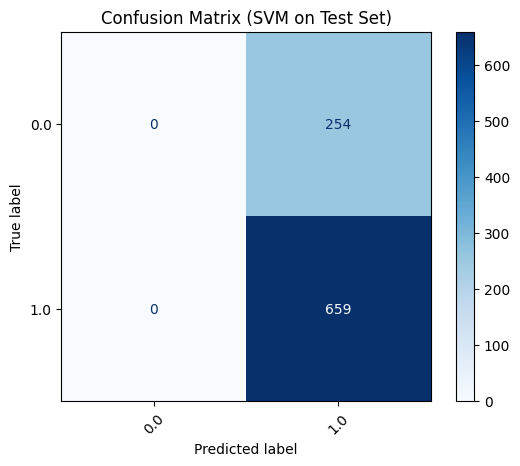

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


#### Grid Search  with Recall concern

In [ ]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)



In [ ]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 1.0000


In [ ]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

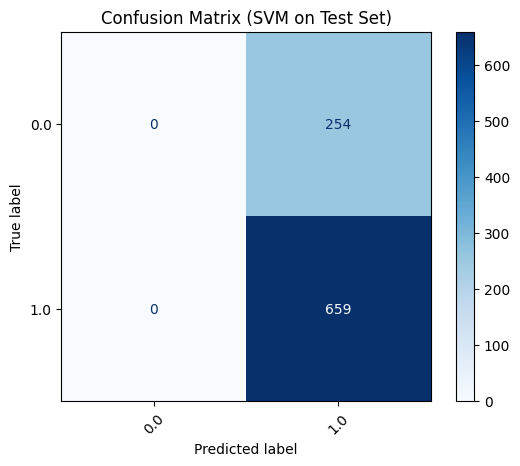

In [ ]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [ ]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


### Logistic Regression

In [ ]:
#@title Logistic Regression with Default Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.6840
Test Accuracy: 0.7218


In [ ]:
#@title Logistic Regression with Grid Search
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],                   # L2 is commonly used
    'solver': ['liblinear', 'lbfgs'],    # liblinear for small data, lbfgs is default
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6840


In [ ]:
#@title Classification Report for Logistic Regression
from sklearn.metrics import classification_report

best_logreg = grid_search.best_estimator_

y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Figure size 600x600 with 0 Axes>

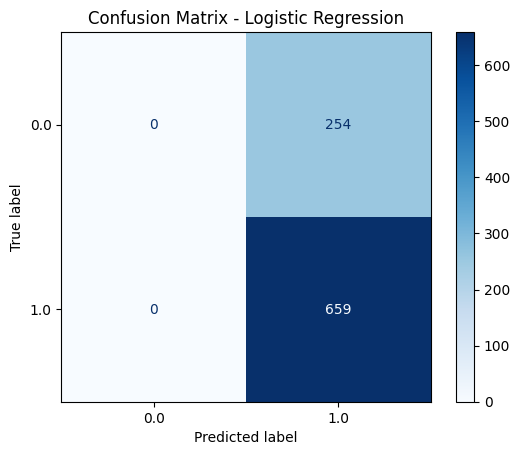

In [ ]:
#@title Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = best_logreg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_logreg.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Naive Baise

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on train and test
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Print accuracies
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.31599123767798465
Test Accuracy: 0.2782037239868565


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


In [ ]:
print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.32      1.00      0.48      1154
         1.0       0.00      0.00      0.00      2498

    accuracy                           0.32      3652
   macro avg       0.16      0.50      0.24      3652
weighted avg       0.10      0.32      0.15      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.28      1.00      0.44       254
         1.0       0.00      0.00      0.00       659

    accuracy                           0.28       913
   macro avg       0.14      0.50      0.22       913
weighted avg       0.08      0.28      0.12       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

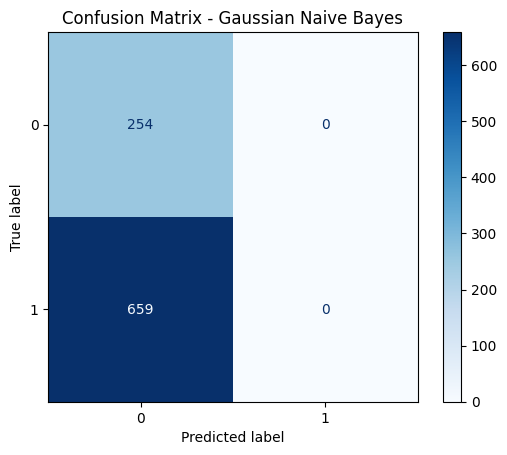

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


## Neural Network Classifier

In [32]:
#@title Define the Network Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

layers = [
    Dense(256, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),  # batch norm before activation
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(16, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(16, activation='relu'),

    Dense(2, activation='softmax')
]

model = Sequential(layers)

#
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# @title Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6510 - loss: 3.7902 - val_accuracy: 0.7218 - val_loss: 0.8786
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6777 - loss: 0.7867 - val_accuracy: 0.7218 - val_loss: 0.6461
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6813 - loss: 0.6520 - val_accuracy: 0.7218 - val_loss: 0.6160
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6829 - loss: 0.6335 - val_accuracy: 0.7218 - val_loss: 0.6067
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6816 - loss: 0.6290 - val_accuracy: 0.7218 - val_loss: 0.6012
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6741 - loss: 0.6319 - val_accuracy: 0.7218 - val_loss: 0.5990
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6898 - loss: 0.6206 - val_accuracy: 0.7218 - val_loss: 0.5973
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6772 - loss: 0.6289 - val_accurac

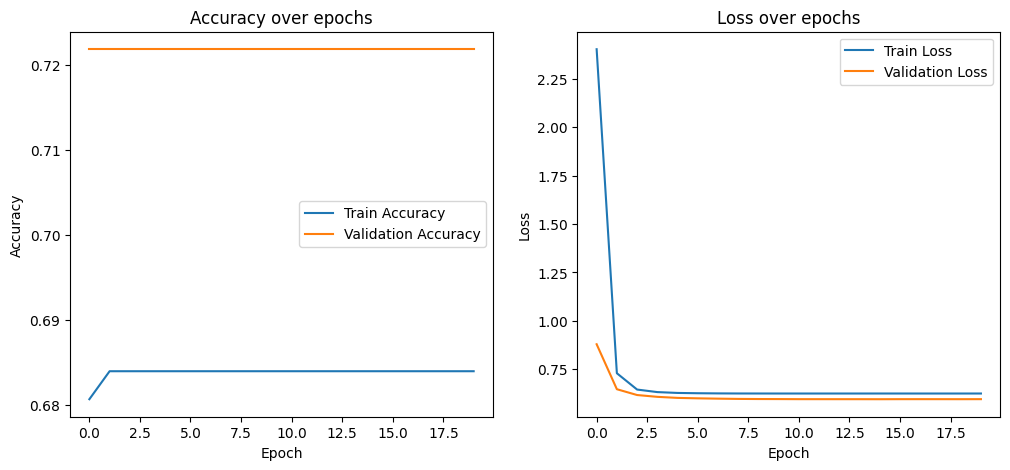

In [34]:
#@title training & validation loss
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [35]:
#@title Classification Report
# Predict classes on test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


# Predict classes on training set
y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Classification report for training set
print("Classification Report - Training Set:\n")
print(classification_report(y_train, y_train_pred, digits=4))

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report - Training Set:

              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000      1154
         1.0     0.6840    1.0000    0.8124      2498

    accuracy                         0.6840      3652
   macro avg     0.3420    0.5000    0.4062      3652
weighted avg     0.4679    0.6840    0.5557      3652

Classification Report:

              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000       254
         1.0     0.7218    1.0000    0.8384       659

    accuracy                         0.7218       913
   macro avg     0.3609    0.5000    0.4192       913
weighted avg     0.5210    0.7218    0.6052       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Figure size 600x600 with 0 Axes>

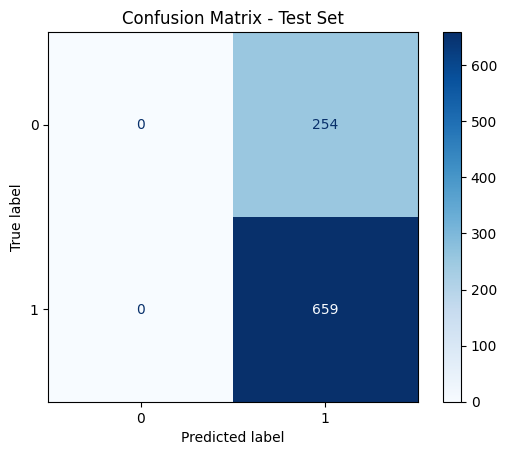

In [36]:
# @title Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()


## E4 Try Placehodlers

In [28]:
# !pip install stanza

In [14]:
#@title Define the NLP Pipeline
from math import sqrt

# Step 1: Download and initialize Arabic Stanza pipeline (if you haven't already)
stanza.download('ar')
nlp = stanza.Pipeline(lang='ar', processors='tokenize,ner')

# Step 2: Function to replace LOC, PER, ORG in a tweet text with placeholders
def replace_ner_with_placeholders(text):
    doc = nlp(text)
    replaced_words = []
    for sentence in doc.sentences:
        for word in sentence.words:
            replaced_words.append(word.text)
    # Collect all entities with their spans
    entities = []
    for ent in doc.ents:
        if ent.type == 'LOC':
            replacement = 'مكان'
        elif ent.type == 'PER':
            replacement = 'شخص'
        elif ent.type == 'ORG':
            replacement = 'منظمة'
        else:
            replacement = None

        if replacement:
            entities.append((ent.start_char, ent.end_char, replacement))
    # Replace entities from end to start (to avoid messing up indices)
    replaced_text = text
    for start, end, rep in sorted(entities, key=lambda x: x[0], reverse=True):
        replaced_text = replaced_text[:start] + rep + replaced_text[end:]
    return replaced_text


# Step 4: Embed modified tweets by averaging word vectors
def embed_tweet(text, model):
    words = text.split()
    vectors = []
    for w in words:
        if w in model.key_to_index:
            vectors.append(model[w])
        else:
            vectors.append(np.zeros(model.vector_size))
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...
INFO:stanza:File exists: /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package      |
----------------------------
| tokenize  | padt         |
| mwt       | padt         |
| ner       | aqmar_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [19]:
# Step 5: Apply replacement and embedding on your DataFrame column with raw tweets (assuming 'tweet_text' column)
df['tweet_text_replaced'] = df['Tweet Text'].apply(replace_ner_with_placeholders)
df['tweet_embedding'] = df['tweet_text_replaced'].apply(lambda txt: embed_tweet(txt, fasttext_model))


In [14]:

print("Sample original tweet:", df['Tweet Text'].iloc[10])
print("Sample replaced tweet:", df['tweet_text_replaced'].iloc[10])


Sample original tweet: ماذا سيفعلون في دمشق يتناولون المرطبات مثلا
Sample replaced tweet: ماذا سيفعلون في مكان يتناولون المرطبات مثلا


### split the DF

In [27]:
X = np.vstack(df['tweet_embedding'].values)
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### K Nearest Neighbor Classifier

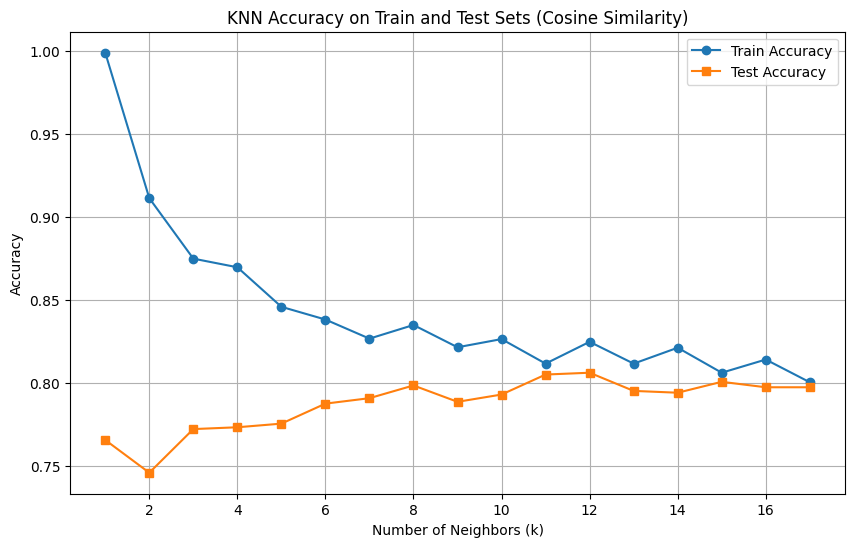

In [29]:
#@title KNN with K from 1 to root of feature size
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


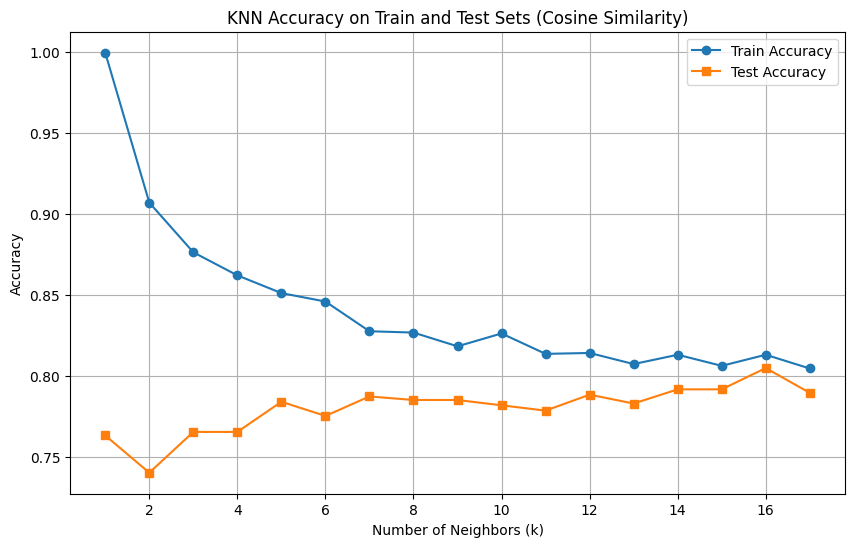

In [30]:
#@title KNN with Cosine Similarity
# Number of training samples
n_train = X_train.shape[1]

# Maximum k to try: integer part of sqrt(n_train)
max_k = int(sqrt(n_train))

# Store accuracies for train and test
train_accuracies = []
test_accuracies = []

k_values = range(1, max_k + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)

    # Predict on train set and test set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Train and Test Sets (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


Best k based on test accuracy: 16


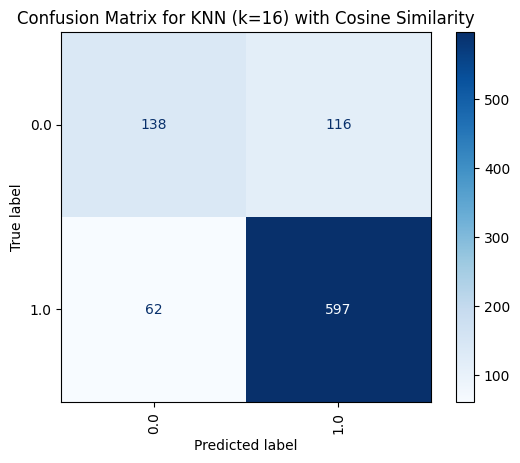

In [31]:
#@title Confuison Matrix for KNN with Cosine Similarity
# Get the best k based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k based on test accuracy: {best_k}")

# Train final model with best_k
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
best_knn.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f'Confusion Matrix for KNN (k={best_k}) with Cosine Similarity')
plt.grid(False)
plt.show()


#### Grid Search for the best Params with f1 Concern

In [32]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [33]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7359


In [34]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71      1154
         1.0       0.85      0.90      0.88      2498

    accuracy                           0.83      3652
   macro avg       0.81      0.78      0.79      3652
weighted avg       0.82      0.83      0.82      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59       254
         1.0       0.84      0.88      0.85       659

    accuracy                           0.79       913
   macro avg       0.73      0.71      0.72       913
weighted avg       0.78      0.79      0.78       913



<Figure size 600x500 with 0 Axes>

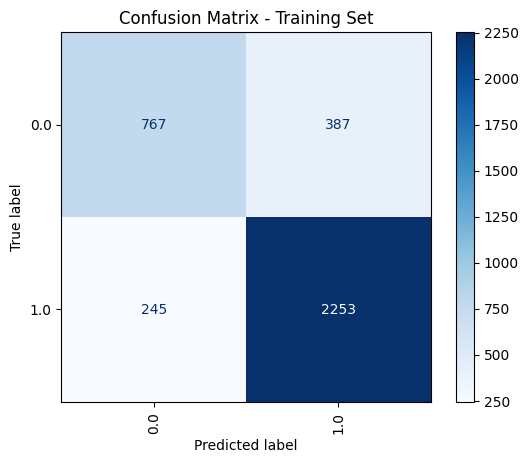

<Figure size 600x500 with 0 Axes>

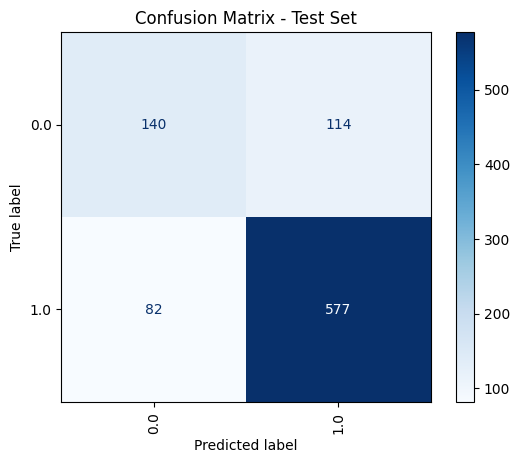

In [35]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

#### Grid Search for the best Params with recall Concern

In [36]:
#@title Define parameter grid
# Calculate max_k based on feature size (embedding length)
embedding_length = X_train.shape[1]
max_k = int(np.sqrt(embedding_length))

# Initialize model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(7, max_k + 1)),
    'metric': ['cosine', 'euclidean',],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'leaf_size': [20, 25, 30, 40],
}

# Setup Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


In [37]:
#@title Fit the Model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7269


In [38]:
#@title Classfication Report
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71      1154
         1.0       0.85      0.90      0.88      2498

    accuracy                           0.83      3652
   macro avg       0.81      0.78      0.79      3652
weighted avg       0.82      0.83      0.82      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59       254
         1.0       0.84      0.88      0.85       659

    accuracy                           0.79       913
   macro avg       0.73      0.71      0.72       913
weighted avg       0.78      0.79      0.78       913



<Figure size 600x500 with 0 Axes>

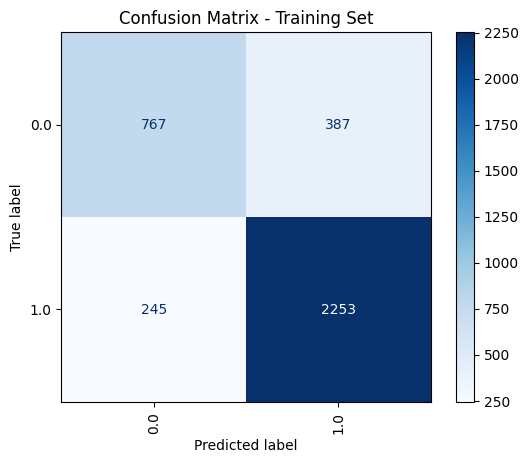

<Figure size 600x500 with 0 Axes>

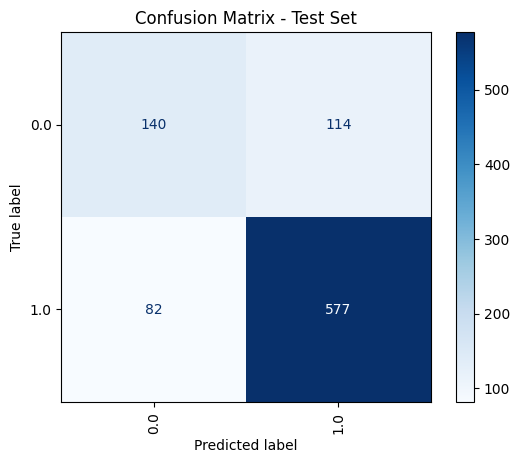

In [39]:
#@title Confusion Matrix
# Define labels to ensure consistent order in the matrix
labels = np.unique(y_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
plt.figure(figsize=(6,5))
disp_train.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
plt.figure(figsize=(6,5))
disp_test.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

### SVM

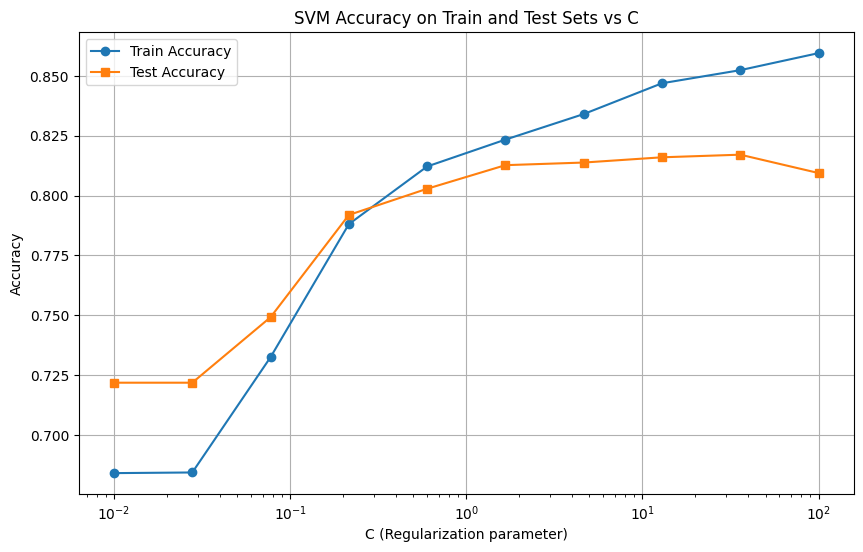

In [40]:
#@title SVM with Linear kernel (jsut to show a base line )
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a range of C values to try (log scale)
C_values = np.logspace(-2, 2, 10)  # 0.01 to 100

train_accuracies = []
test_accuracies = []

for C in C_values:
    svm = SVC(C=C, kernel='linear')  # using linear kernel, you can try others like 'rbf'
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy on Train and Test Sets vs C')
plt.legend()
plt.grid(True)
plt.show()


#### Grid Search  with f1 concern

In [41]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)



In [42]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7726


In [43]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1154
         1.0       0.87      0.91      0.89      2498

    accuracy                           0.84      3652
   macro avg       0.82      0.80      0.81      3652
weighted avg       0.84      0.84      0.84      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.67       254
         1.0       0.87      0.88      0.88       659

    accuracy                           0.82       913
   macro avg       0.77      0.77      0.77       913
weighted avg       0.82      0.82      0.82       913



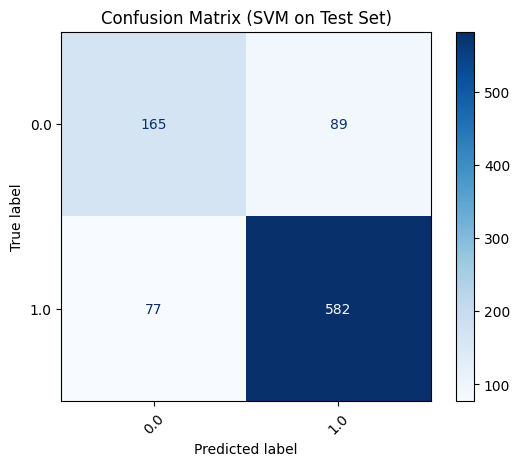

In [44]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [46]:
import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


#### Grid Search  with Recall concern

In [47]:
#@title Define Parameter Grid
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Kernel types to try'rbf'
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)



In [48]:
#@title Fit the Model
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 1.0000


In [49]:

#@title Classification Report
best_svm = grid_search_svm.best_estimator_

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1154
         1.0       0.68      1.00      0.81      2498

    accuracy                           0.68      3652
   macro avg       0.34      0.50      0.41      3652
weighted avg       0.47      0.68      0.56      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       254
         1.0       0.72      1.00      0.84       659

    accuracy                           0.72       913
   macro avg       0.36      0.50      0.42       913
weighted avg       0.52      0.72      0.61       913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

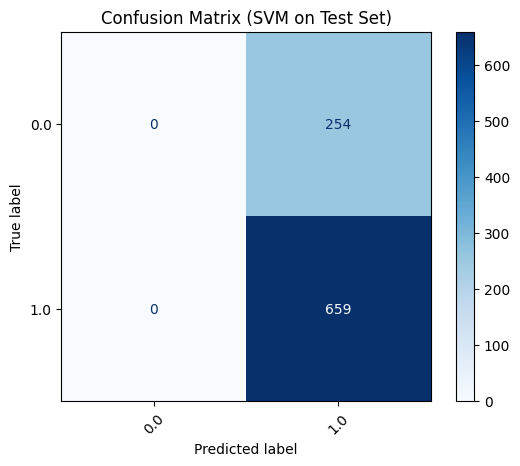

In [50]:
#@title Confusion Matrix
# Predict using the best model from GridSearch
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM on Test Set)")
plt.grid(False)
plt.show()


In [51]:
# import joblib

# @title  Save the grid search SVM model to a file
joblib.dump(grid_search_svm, 'grid_search_svm_model.joblib')
print("SVM Grid Search model saved as 'grid_search_svm_model.joblib'")


SVM Grid Search model saved as 'grid_search_svm_model.joblib'


### Logistic Regression

In [52]:
#@title Logistic Regression with Default Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8070
Test Accuracy: 0.7941


In [53]:
#@title Logistic Regression with Grid Search
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],                   # L2 is commonly used
    'solver': ['liblinear', 'lbfgs'],    # liblinear for small data, lbfgs is default
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8133


In [54]:
#@title Classification Report for Logistic Regression
from sklearn.metrics import classification_report

best_logreg = grid_search.best_estimator_

y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      1154
         1.0       0.85      0.90      0.88      2498

    accuracy                           0.83      3652
   macro avg       0.81      0.79      0.80      3652
weighted avg       0.83      0.83      0.83      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       254
         1.0       0.87      0.89      0.88       659

    accuracy                           0.83       913
   macro avg       0.79      0.77      0.78       913
weighted avg       0.82      0.83      0.82       913



<Figure size 600x600 with 0 Axes>

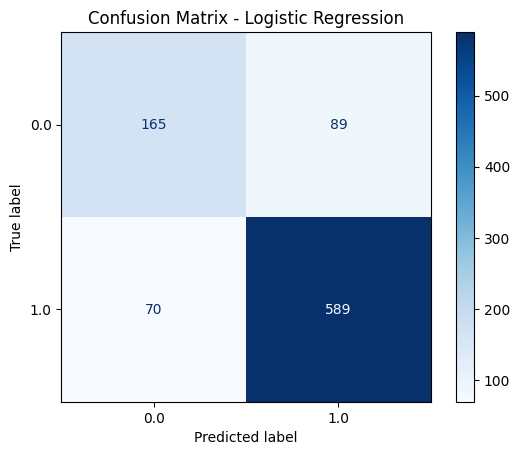

In [55]:
#@title Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = best_logreg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=best_logreg.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Naive Baise

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on train and test
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Print accuracies
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.7352135815991238
Test Accuracy: 0.7535596933187295


In [57]:
print("Classification Report - Training Set")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.60      0.49      0.54      1154
         1.0       0.78      0.85      0.81      2498

    accuracy                           0.74      3652
   macro avg       0.69      0.67      0.68      3652
weighted avg       0.72      0.74      0.73      3652

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.57      0.49      0.53       254
         1.0       0.81      0.85      0.83       659

    accuracy                           0.75       913
   macro avg       0.69      0.67      0.68       913
weighted avg       0.74      0.75      0.75       913



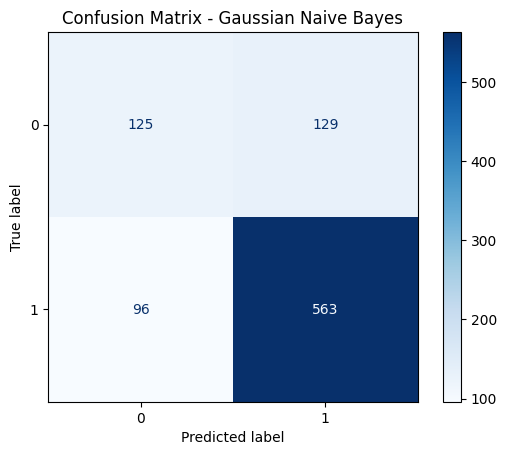

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()


## Neural Network Classifier

In [15]:
#@title Define the Network Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

layers = [
    Dense(256, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),  # batch norm before activation
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(16, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(16, activation='relu'),

    Dense(2, activation='softmax')
]

model = Sequential(layers)

#
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# @title Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.6995 - loss: 5.4658 - val_accuracy: 0.7218 - val_loss: 3.3598
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8047 - loss: 2.7809 - val_accuracy: 0.7218 - val_loss: 1.8521
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8011 - loss: 1.5001 - val_accuracy: 0.7218 - val_loss: 1.1610
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8083 - loss: 0.9191 - val_accuracy: 0.7415 - val_loss: 0.8099
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8158 - loss: 0.6897 - val_accuracy: 0.7645 - val_loss: 0.6575
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8026 - loss: 0.5898 - val_accuracy: 0.8138 - val_loss: 0.5486
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8163 - loss: 0.5222 - val_accuracy: 0.8215 - val_loss: 0.5340
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8120 - loss: 0.4976 - val_accuracy

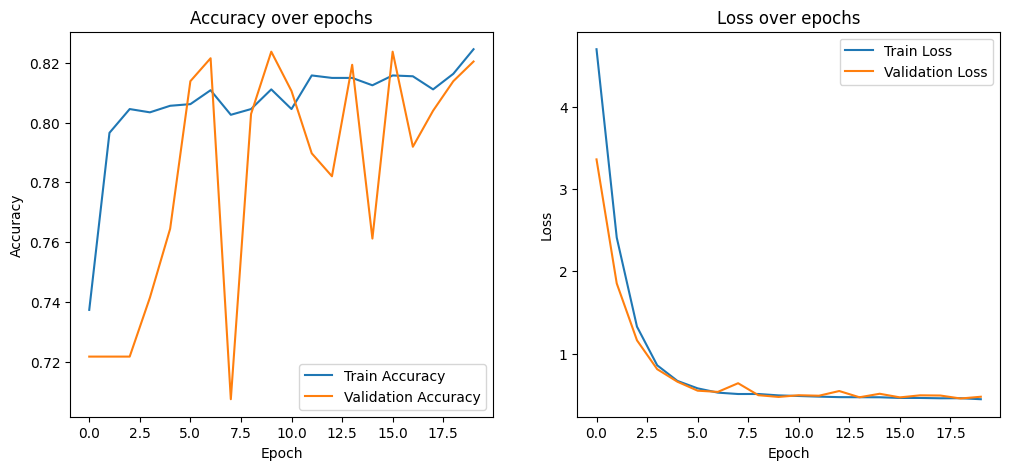

In [19]:
#@title training & validation loss
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [26]:
#@title Classification Report
# Predict classes on test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


# Predict classes on training set
y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Classification report for training set
print("Classification Report - Training Set:\n")
print(classification_report(y_train, y_train_pred, digits=4))

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report - Training Set:

              precision    recall  f1-score   support

         0.0     0.7544    0.7132    0.7332      1154
         1.0     0.8708    0.8927    0.8816      2498

    accuracy                         0.8360      3652
   macro avg     0.8126    0.8029    0.8074      3652
weighted avg     0.8340    0.8360    0.8347      3652

Classification Report:

              precision    recall  f1-score   support

         0.0     0.6758    0.6811    0.6784       254
         1.0     0.8767    0.8741    0.8754       659

    accuracy                         0.8204       913
   macro avg     0.7762    0.7776    0.7769       913
weighted avg     0.8208    0.8204    0.8206       913



<Figure size 600x600 with 0 Axes>

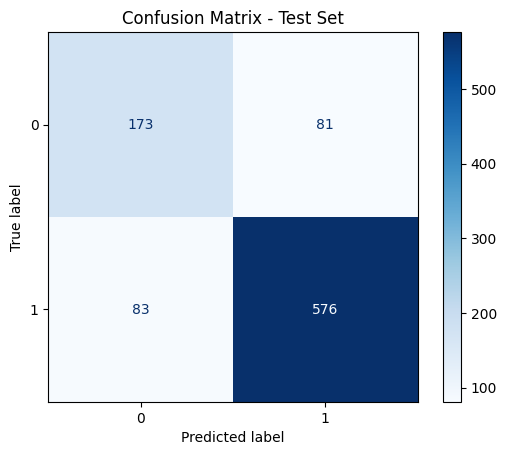

In [27]:
# @title Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()


## Conclusion

In [15]:
# @title Saving The Data Set
df.to_csv("drive/MyDrive/labeled.csv")